#

CMS Hospital Rating Model
-
#### Submission by : Samar Anis Khan



## Problem statement

Evanston Hospital, a leading acute-care facility in Illinois, has been rated continuesly a **CMS rating of 3** for the past five years despite significant investments in service improvements. This stagnant rating has contributed to a **decline in revenue**, as hospital ratings heavily influence consumer choice. 

As consultants, the objective is to **analyze the root causes** behind the hospital’s average rating and provide **strategic recommendations** to improve it.

## Solution

**The broad solution methodology that needs to be followed in this Capstone project is as follows:**

•	Use the concepts of structured problem-solving to identify potential root causes for the issues faced by Evanston Hospital
•	Build a rating prediction model of past hospital data as a proof of concept

Steps:
•	Understanding the data, cleaning it and preparing it for further analysis
•	Performing univariate/bivariate analysis and feature engineering
•	Training different machine learning models on the data
•	Choosing and evaluating the model that provides the best metrics
•	Data storytelling using the insights and modelling results, and proposing a business solutionpolution

######
# 1. Import Data

### 1.1 Import Required libraries

In [2]:
# Import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 100

%matplotlib inline

ModuleNotFoundError: No module named 'seaborn'

### 1.2 Load Data from the file Hospital General Infomation

In [9]:
#Reading Hospital general information file
df_hospital = pd.read_csv(r'C:\UpgradModules\Capstone Project\Project\FlatFiles\Hospital General Information.csv',encoding='cp1252')
df_hospital.columns = df_hospital.columns.str.strip().str.lower().str.replace(' ', '_')

#Display the top records
df_hospital.head(10)

provider_id                     hospital_name  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER   
1        10005     MARSHALL MEDICAL CENTER SOUTH   
2        10006    ELIZA COFFEE MEMORIAL HOSPITAL   
3        10007          MIZELL MEMORIAL HOSPITAL   
4        10008       CRENSHAW COMMUNITY HOSPITAL   
5        10011                 ST VINCENT'S EAST   
6        10012    DEKALB REGIONAL MEDICAL CENTER   
7        10016     SHELBY BAPTIST MEDICAL CENTER   
8        10018             CALLAHAN EYE HOSPITAL   
9        10019    HELEN KELLER MEMORIAL HOSPITAL   

                        address        city state  zip_code county_name  \
0        1108 ROSS CLARK CIRCLE      DOTHAN    AL     36301     HOUSTON   
1    2505 U S HIGHWAY 431 NORTH        BOAZ    AL     35957    MARSHALL   
2            205 MARENGO STREET    FLORENCE    AL     35631  LAUDERDALE   
3                 702 N MAIN ST         OPP    AL     36467   COVINGTON   
4           101 HOSPITAL CIRCLE     LUVERNE    AL     36049    CRENSHAW   
5    50 MEDICAL PARK EAST DRIVE  BIRMINGHAM    AL     35235   JEFFERSON   
6          200 MED CENTER DRIVE  FORT PAYNE    AL     35968     DE KALB   
7       1000 FIRST STREET NORTH   ALABASTER    AL     35007      SHELBY   
8          1720 UNIVERSITY BLVD  BIRMINGHAM    AL     35233   JEFFERSON   
9  1300 SOUTH MONTGOMERY AVENUE   SHEFFIELD    AL     35660     COLBERT   

   phone_number         hospital_type  \
0    3347938701  Acute Care Hospitals   
1    2565938310  Acute Care Hospitals   
2    2567688400  Acute Care Hospitals   
3    3344933541  Acute Care Hospitals   
4    3343353374  Acute Care Hospitals   
5    2058383122  Acute Care Hospitals   
6    2568453150  Acute Care Hospitals   
7    2056208100  Acute Care Hospitals   
8    2053258100  Acute Care Hospitals   
9    2563864556  Acute Care Hospitals   

                            hospital_ownership emergency_services  \
0  Government - Hospital District or Authority                Yes   
1  Government - Hospital District or Authority                Yes   
2  Government - Hospital District or Authority                Yes   
3               Voluntary non-profit - Private                Yes   
4                                  Proprietary                Yes   
5               Voluntary non-profit - Private                Yes   
6                                  Proprietary                Yes   
7               Voluntary non-profit - Private                Yes   
8               Voluntary non-profit - Private                Yes   
9  Government - Hospital District or Authority                Yes   

  meets_criteria_for_meaningful_use_of_ehrs hospital_overall_rating  \
0                                         Y                       3   
1                                         Y                       3   
2                                         Y                       2   
3                                         Y                       3   
4                                         Y                       3   
5                                         Y                       2   
6                                         Y                       3   
7                                         Y                       3   
8                                         Y           Not Available   
9                                         Y                       2   

                    hospital_overall_rating_footnote  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   
6                                                NaN   
7                                                NaN   
8  There are too few measures or measure groups r...   
9                                                N

In [10]:
# inspecting the dataset
df_hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 28 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   provider_id                                                    4818 non-null   int64 
 1   hospital_name                                                  4818 non-null   object
 2   address                                                        4818 non-null   object
 3   city                                                           4818 non-null   object
 4   state                                                          4818 non-null   object
 5   zip_code                                                       4818 non-null   int64 
 6   county_name                                                    4803 non-null   object
 7   phone_number                                                   4818 n

#### *From the above information, its clear that _footnote columns are not required and could be removed from the dataset without further analysis*

In [12]:
# Drop all the footnote columns
footnote_filter = df_hospital.filter(regex='footnote').columns
print (footnote_filter)

df_hospital = df_hospital[df_hospital.columns.drop(footnote_filter)]
df_hospital.head(3)

Index(['hospital_overall_rating_footnote',
       'mortality_national_comparison_footnote',
       'safety_of_care_national_comparison_footnote',
       'readmission_national_comparison_footnote',
       'patient_experience_national_comparison_footnote',
       'effectiveness_of_care_national_comparison_footnote',
       'timeliness_of_care_national_comparison_footnote',
       'efficient_use_of_medical_imaging_national_comparison_footnote'],
      dtype='object')


provider_id                     hospital_name                     address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE   
1        10005     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
2        10006    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET   

       city state  zip_code county_name  phone_number         hospital_type  \
0    DOTHAN    AL     36301     HOUSTON    3347938701  Acute Care Hospitals   
1      BOAZ    AL     35957    MARSHALL    2565938310  Acute Care Hospitals   
2  FLORENCE    AL     35631  LAUDERDALE    2567688400  Acute Care Hospitals   

                            hospital_ownership emergency_services  \
0  Government - Hospital District or Authority                Yes   
1  Government - Hospital District or Authority                Yes   
2  Government - Hospital District or Authority                Yes   

  meets_criteria_for_meaningful_use_of_ehrs hospital_overall_rating  \
0                                         Y                       3   
1                                         Y                       3   
2                                         Y                       2   

  mortality_national_comparison safety_of_care_national_comparison  \
0  Same as the National average         Above the National average   
1    Below the National average       Same as the National average   
2    Below the National average       Same as the National average   

  readmission_national_comparison patient_experience_national_comparison  \
0    Same as the National average             Below the National average   
1      Above the National average           Same as the National average   
2    Same as the National average             Below the National average   

  effectiveness_of_care_national_comparison  \
0              Same as the National average   
1              Same as the National average   
2              Same as the National average   

  timeliness_of_care_national_comparison  \
0           Same as the National average   
1             Above the National average   
2             Above the National average   

  efficient_use_of_medical_imaging_national_comparison  
0                       Same as the National average    
1                         Below the National average    
2                       Same as the National average

In [13]:
#Check Missing values
df_hospital.isnull().sum()
(df_hospital.isnull().sum() / len(df_hospital)) * 100

provider_id                                             0.000000
hospital_name                                           0.000000
address                                                 0.000000
city                                                    0.000000
state                                                   0.000000
zip_code                                                0.000000
county_name                                             0.311333
phone_number                                            0.000000
hospital_type                                           0.000000
hospital_ownership                                      0.000000
emergency_services                                      0.000000
meets_criteria_for_meaningful_use_of_ehrs               9.028643
hospital_overall_rating                                 0.000000
mortality_national_comparison                           0.000000
safety_of_care_national_comparison                      0.000000
readmission_national_comp

In [14]:
df_hospital['meets_criteria_for_meaningful_use_of_ehrs'].value_counts()

meets_criteria_for_meaningful_use_of_ehrs
Y    4383
Name: count, dtype: int64

#### *All values in the column 'meets_criteria_for_meaningful_use_of_ehrs' is Y and therefore the column can be dropped*

In [16]:
#Drop Column meets_criteria_for_meaningful_use_of_ehrs
df_hospital.drop(columns=['meets_criteria_for_meaningful_use_of_ehrs'], inplace=True)
df_hospital.isnull().sum()

provider_id                                              0
hospital_name                                            0
address                                                  0
city                                                     0
state                                                    0
zip_code                                                 0
county_name                                             15
phone_number                                             0
hospital_type                                            0
hospital_ownership                                       0
emergency_services                                       0
hospital_overall_rating                                  0
mortality_national_comparison                            0
safety_of_care_national_comparison                       0
readmission_national_comparison                          0
patient_experience_national_comparison                   0
effectiveness_of_care_national_comparison               

In [17]:
#Checking the value counts in country name columns
df_hospital['county_name'].value_counts()

county_name
LOS ANGELES    83
COOK           51
JEFFERSON      47
MONTGOMERY     44
WASHINGTON     44
               ..
DEWITT          1
JO DAVIESS      1
PIATT           1
CATTARAUGUS     1
COMAL           1
Name: count, Length: 1565, dtype: int64

#### *The column 'Country_name' has feature lenght of 1500+ and need to be removed*

In [19]:
# the Column country_name  need to be dropped given the feature length of ~1400
df_hospital.drop(columns=['county_name'], inplace=True)

###
### 1.3 Analysing the Data

In [21]:
#EDA for decriptive analysis
df_hospital.describe()

provider_id      zip_code  phone_number
count    4818.000000   4818.000000  4.818000e+03
mean   267983.546492  53956.188667  5.849487e+09
std    156646.082755  26915.868321  2.329768e+09
min     10001.000000    603.000000  9.369338e+08
25%    140185.250000  33013.750000  4.017728e+09
50%    260037.000000  55395.500000  6.053298e+09
75%    390209.250000  76019.250000  7.877564e+09
max    670112.000000  99929.000000  9.898943e+09

In [22]:
# the Column Zip_code, phone_number can be dropped as its not useful in analysis
df_hospital.drop(columns=['zip_code','phone_number'], inplace=True)

In [23]:
#checking missing values
100*df_hospital.isnull().mean()

provider_id                                             0.0
hospital_name                                           0.0
address                                                 0.0
city                                                    0.0
state                                                   0.0
hospital_type                                           0.0
hospital_ownership                                      0.0
emergency_services                                      0.0
hospital_overall_rating                                 0.0
mortality_national_comparison                           0.0
safety_of_care_national_comparison                      0.0
readmission_national_comparison                         0.0
patient_experience_national_comparison                  0.0
effectiveness_of_care_national_comparison               0.0
timeliness_of_care_national_comparison                  0.0
efficient_use_of_medical_imaging_national_comparison    0.0
dtype: float64

#### *Rest of the columns are categorical columns and hence create plots to check the distributions*

In [25]:
# Map only categorical columns
categorical_cols = df_hospital.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['hospital_name', 'address', 'city', 'state', 'hospital_type',
       'hospital_ownership', 'emergency_services', 'hospital_overall_rating',
       'mortality_national_comparison', 'safety_of_care_national_comparison',
       'readmission_national_comparison',
       'patient_experience_national_comparison',
       'effectiveness_of_care_national_comparison',
       'timeliness_of_care_national_comparison',
       'efficient_use_of_medical_imaging_national_comparison'],
      dtype='object')


# the Column Address can be dropped as its not useful in analysis
df_hospital.drop(columns=['address'], inplace=True)


#### *Find the value counts of categorical columns*

In [28]:
# Map remaining categorical columns
categorical_cols = df_hospital.select_dtypes(include=['object']).columns

#Looping through all categorical columns
for col in categorical_cols:
    print(f"\n🔹 Value Counts for Categorical Column: {col}")
    print(df_hospital[col].value_counts())
    print("-" * 50)



🔹 Value Counts for Categorical Column: hospital_name
hospital_name
MEMORIAL HOSPITAL                   15
COMMUNITY MEMORIAL HOSPITAL          8
GOOD SAMARITAN HOSPITAL              7
ST JOSEPH HOSPITAL                   7
SHRINERS HOSPITALS FOR CHILDREN      7
                                    ..
STANTON COUNTY HOSPITAL              1
PAWNEE VALLEY COMMUNITY HOSPITAL     1
ANTHONY MEDICAL CENTER               1
SHERIDAN COUNTY HOSPITAL             1
COMMONWEALTH HEALTH CENTER           1
Name: count, Length: 4617, dtype: int64
--------------------------------------------------

🔹 Value Counts for Categorical Column: city
city
CHICAGO         29
HOUSTON         26
LOS ANGELES     20
PHILADELPHIA    19
DALLAS          19
                ..
THIBODAUX        1
NATCHITOCHES     1
MORGAN CITY      1
OPELOUSAS        1
GARAPAN          1
Name: count, Length: 2949, dtype: int64
--------------------------------------------------

🔹 Value Counts for Categorical Column: state
state
TX    407


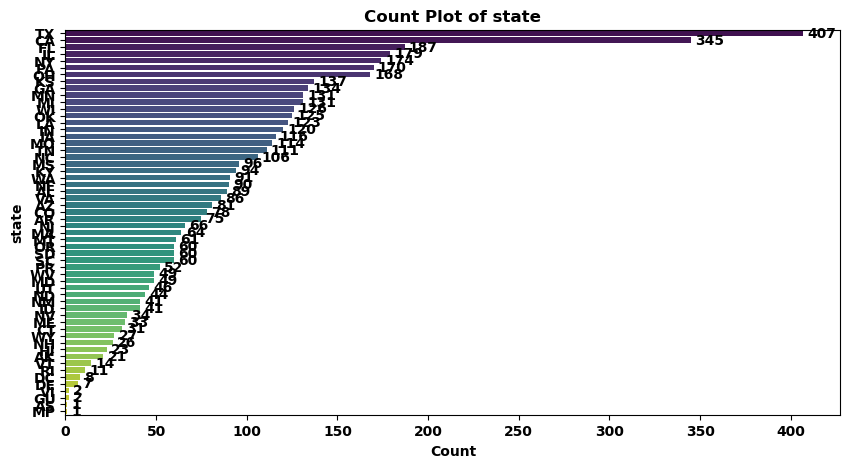

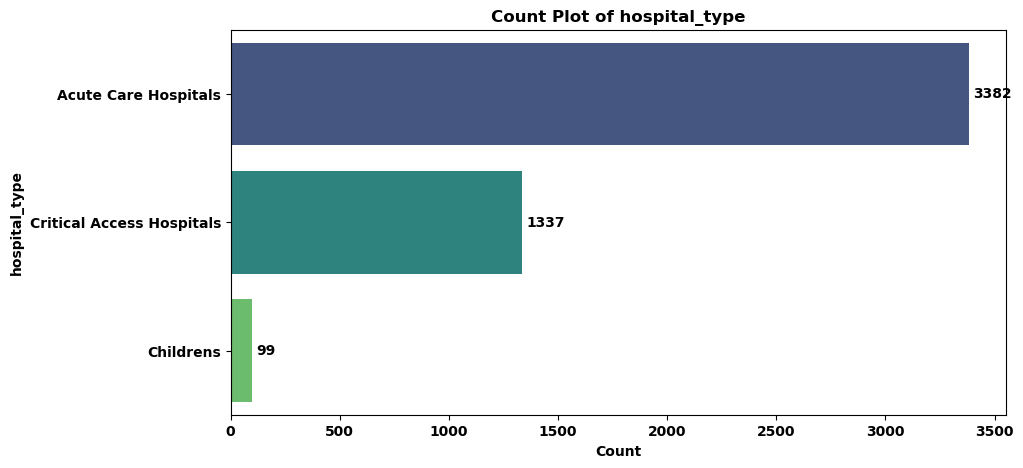

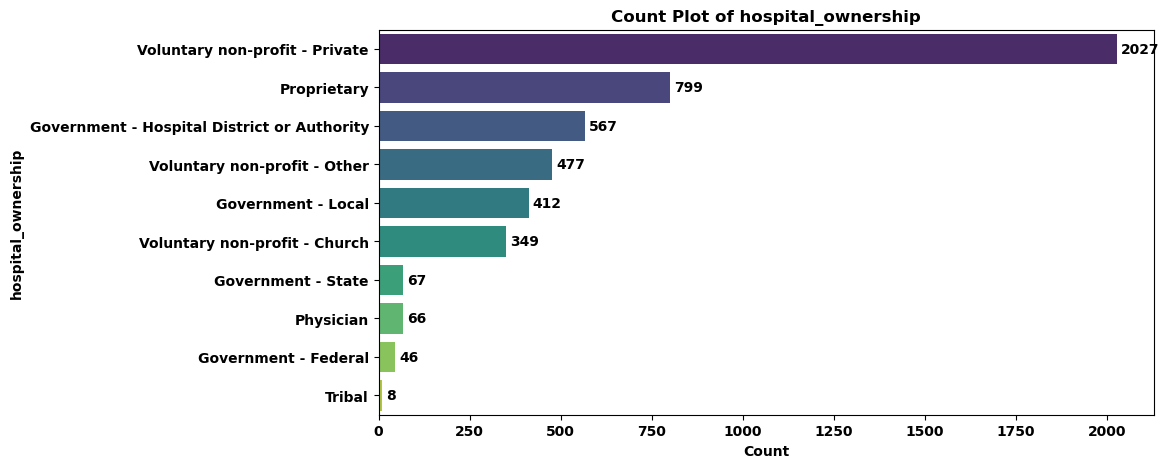

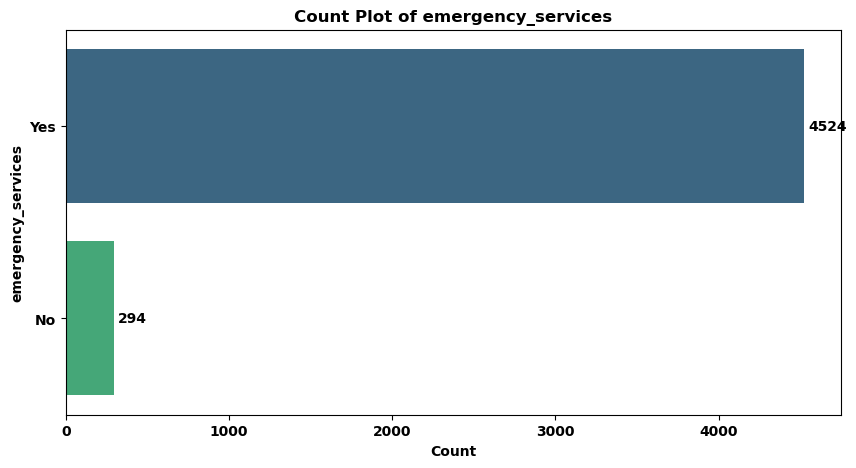

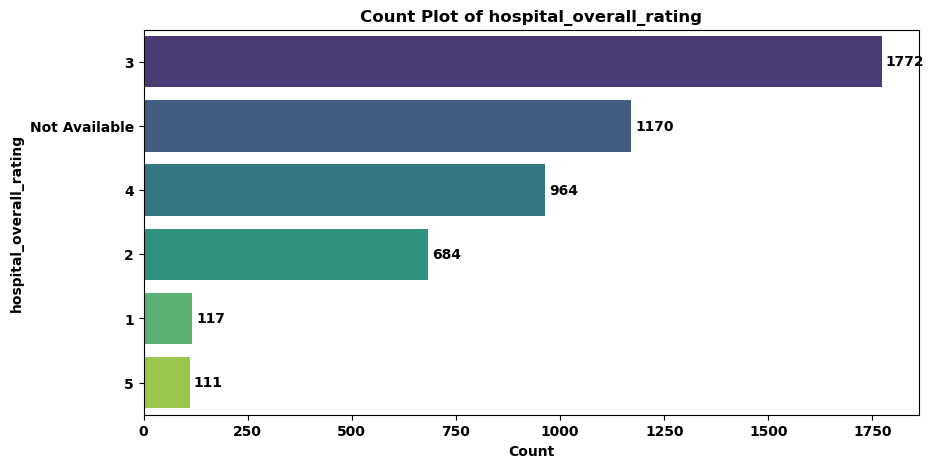

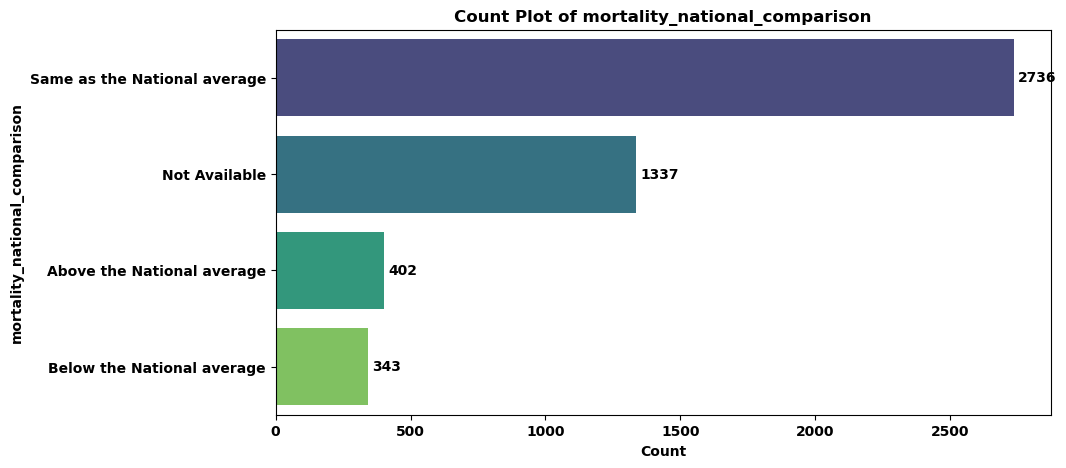

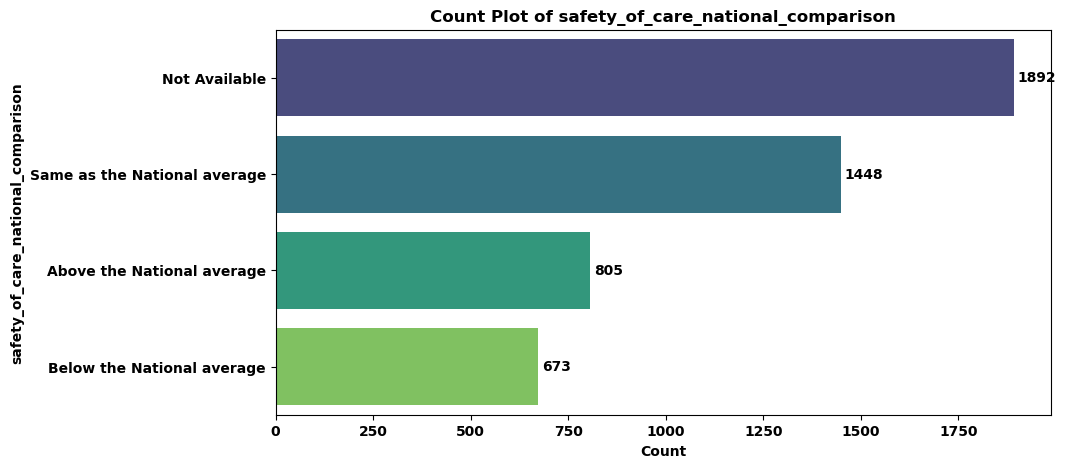

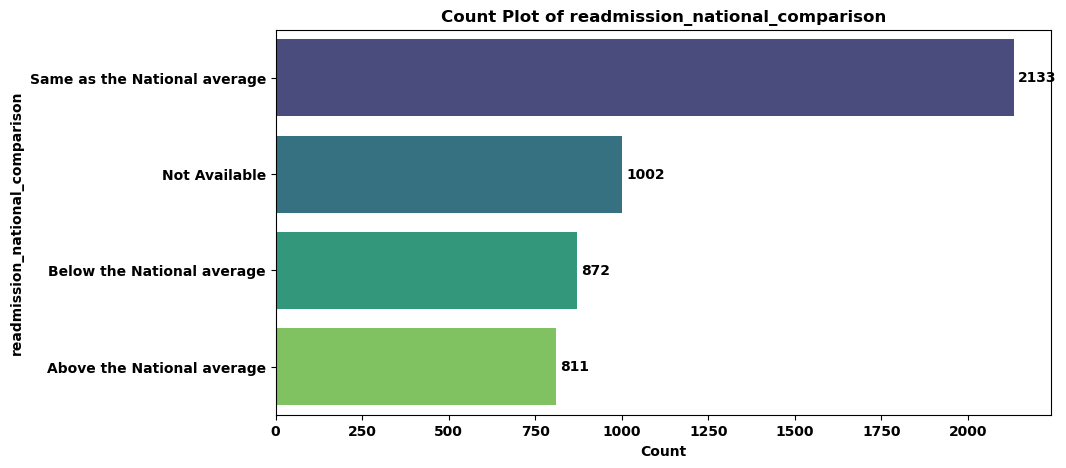

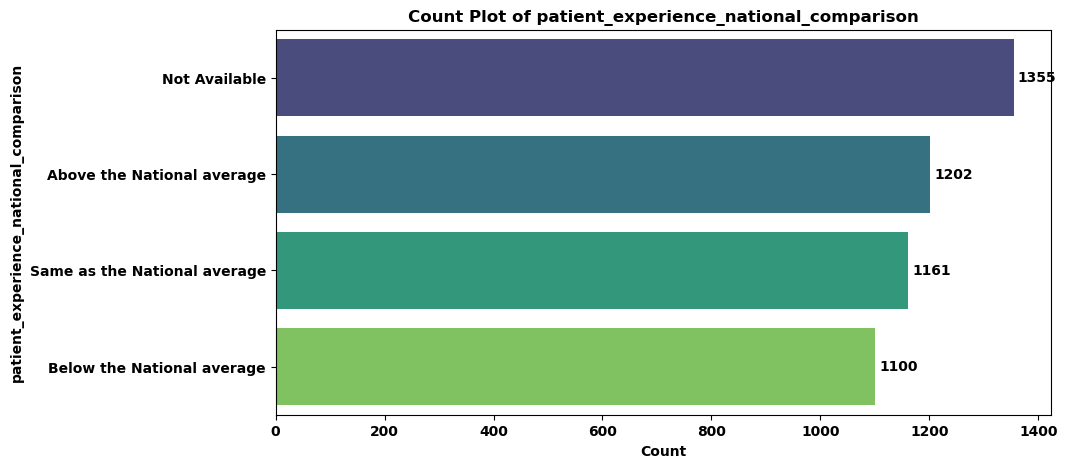

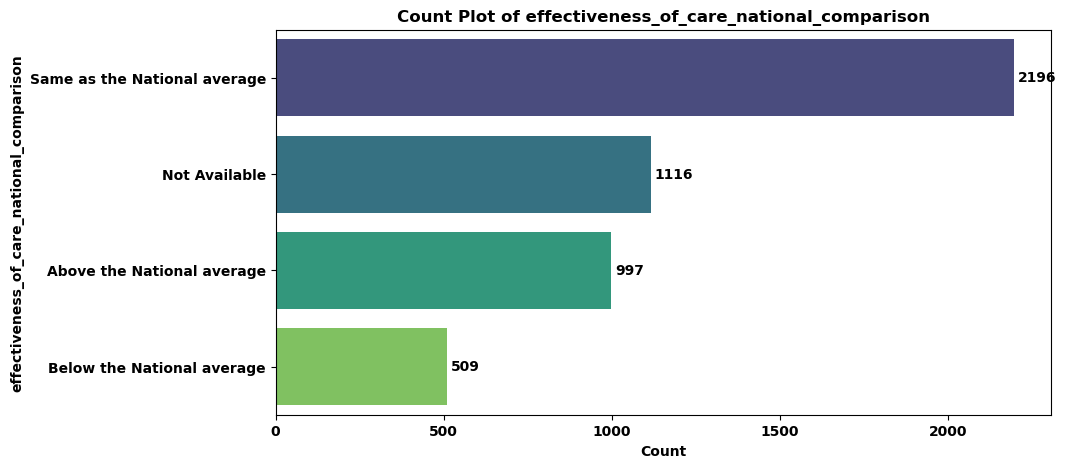

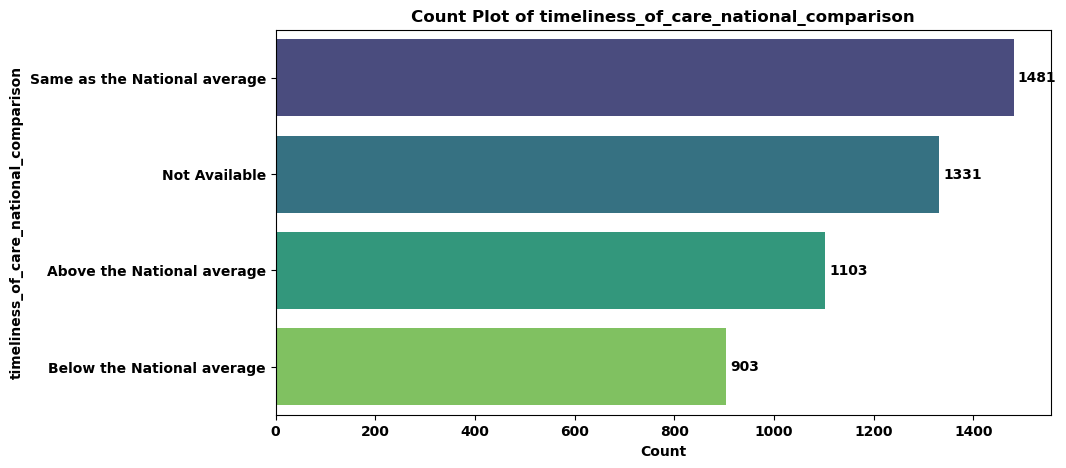

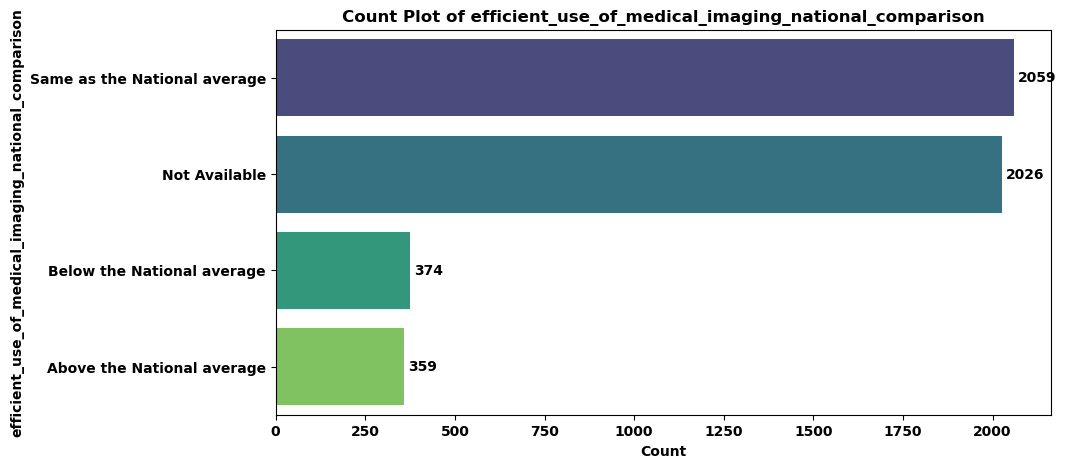

In [29]:
# Loop through categorical columns and plot count plots
for col in categorical_cols:
    if col != 'hospital_name' and col != 'city':  # Excluding 'hospital_name' 'city' since it's a long list to be plotted
        plt.figure(figsize=(10, 5))
        ax = sns.countplot(data=df_hospital, y=col, order=df_hospital[col].value_counts().index, palette="viridis")

        # Add data labels
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', label_type='edge', padding=3)  # Adds count values
        
        plt.title(f'Count Plot of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.show()


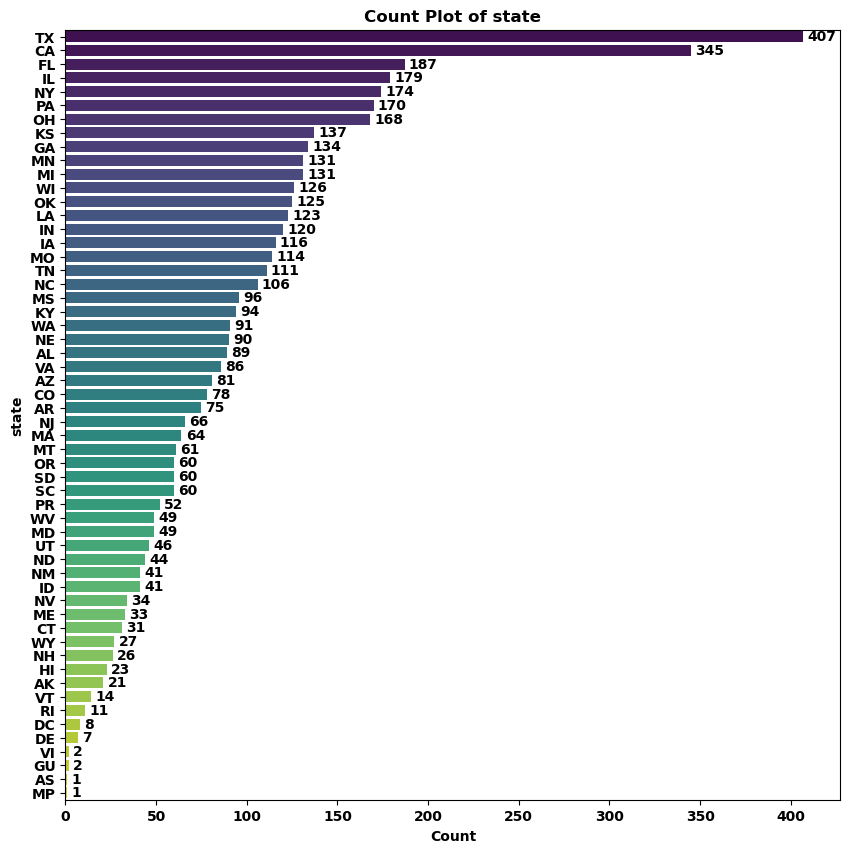

In [30]:
# Plot state separately as the initial plot is not legible 
col='state'
plt.figure(figsize=(10, 10))
ax = sns.countplot(data=df_hospital, y=col, order=df_hospital[col].value_counts().index, palette="viridis")

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)  # Adds count values

plt.title(f'Count Plot of {col}')
plt.xlabel('Count')
plt.ylabel(col)
plt.show()

In [31]:
#Check the dataset
df_hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 15 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   provider_id                                           4818 non-null   int64 
 1   hospital_name                                         4818 non-null   object
 2   city                                                  4818 non-null   object
 3   state                                                 4818 non-null   object
 4   hospital_type                                         4818 non-null   object
 5   hospital_ownership                                    4818 non-null   object
 6   emergency_services                                    4818 non-null   object
 7   hospital_overall_rating                               4818 non-null   object
 8   mortality_national_comparison                         4818 non-null 

### *The columns with national comparison is not required for modelling as this is derived from the final ratings of each categories, and hence they can be removed*

In [33]:
# Drop the columns not required for model building
dropcols = ['hospital_name',
            'city',
            'safety_of_care_national_comparison',
            'mortality_national_comparison',
            'timeliness_of_care_national_comparison',
            'readmission_national_comparison',
            'patient_experience_national_comparison',
            'effectiveness_of_care_national_comparison',
            'efficient_use_of_medical_imaging_national_comparison']

df_hospital.drop(columns=dropcols, inplace=True)


In [34]:
#Check dataset details
df_hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   provider_id              4818 non-null   int64 
 1   state                    4818 non-null   object
 2   hospital_type            4818 non-null   object
 3   hospital_ownership       4818 non-null   object
 4   emergency_services       4818 non-null   object
 5   hospital_overall_rating  4818 non-null   object
dtypes: int64(1), object(5)
memory usage: 226.0+ KB


In [35]:
df_hospital.shape

(4818, 6)

#####
# 2.Merge Datasets

### Merging other datasets to map all features from each categories of Rating

##### The feature selection is done based on the information provided in the FAQ document of Hospital Compare overall rating
##### https://d279m997dpfwgl.cloudfront.net/wp/2016/07/Hospital_Quality_Star_Ratings.pdf

###  2.1 Mortality - Readmission and Death

In [40]:
# Selecting all features required from the Mortality and readmission dataset 
features = ['MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN', 'MORT_30_STK','READM_30_AMI',
            'READM_30_CABG','READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE', 'READM_30_HOSP_WIDE', 'READM_30_PN', 
            'READM_30_STK']

In [41]:
# reading .csv file
df_readm_csv = pd.read_csv(r'C:\UpgradModules\Capstone Project\Project\FlatFiles\Readmissions and Deaths - Hospital.csv',encoding='cp1252')

#formatting column names to standard format across all datasets
df_readm_csv.columns = df_readm_csv.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df_readm_csv.head()

provider_id                     hospital_name                 address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     city state  zip_code county_name  phone_number  \
0  DOTHAN    AL     36301     HOUSTON    3347938701   
1  DOTHAN    AL     36301     HOUSTON    3347938701   
2  DOTHAN    AL     36301     HOUSTON    3347938701   
3  DOTHAN    AL     36301     HOUSTON    3347938701   
4  DOTHAN    AL     36301     HOUSTON    3347938701   

                                        measure_name    measure_id  \
0  Acute Myocardial Infarction (AMI) 30-Day Morta...   MORT_30_AMI   
1                                Death rate for CABG  MORT_30_CABG   
2  Death rate for chronic obstructive pulmonary d...  MORT_30_COPD   
3           Heart failure (HF) 30-Day Mortality Rate    MORT_30_HF   
4               Pneumonia (PN) 30-Day Mortality Rate    MORT_30_PN   

                  compared_to_national denominator score lower_estimate  \
0  No Different than the National Rate         733  12.5           10.6   
1  No Different than the National Rate         278   4.2            2.6   
2  No Different than the National Rate         586   9.3            7.3   
3  No Different than the National Rate         797  12.4           10.4   
4  No Different than the National Rate         599  15.5           13.0   

  higher_estimate footnote measure_start_date measure_end_date  
0            14.9      NaN         07/01/2012       06/30/2015  
1             6.8      NaN         07/01/2012       06/30/2015  
2            11.8      NaN         07/01/2012       06/30/2015  
3            14.6      NaN         07/01/2012       06/30/2015  
4            18.5      NaN         07/01/2012       06/30/2015

In [42]:
#Retaining only the required columns
df_readm = df_readm_csv[['provider_id','measure_id','score']]

#Removing duplicates
df_readm = df_readm.drop_duplicates(subset=['provider_id','measure_id'], keep='first')

#Keeping only the required measures
df_readm = df_readm.loc[df_readm['measure_id'].isin(features)]

#Keeping the list of measures with names for reference
df_readm_measures = df_readm_csv[['measure_id','measure_name']].drop_duplicates()


#Counting the frequency of measures
df_readm.groupby(['measure_id']).size().reset_index(name='counts')


measure_id  counts
0          MORT_30_AMI    4818
1         MORT_30_CABG    4818
2         MORT_30_COPD    4818
3           MORT_30_HF    4818
4           MORT_30_PN    4818
5          MORT_30_STK    4818
6         READM_30_AMI    4818
7        READM_30_CABG    4818
8        READM_30_COPD    4818
9          READM_30_HF    4818
10   READM_30_HIP_KNEE    4818
11  READM_30_HOSP_WIDE    4818
12         READM_30_PN    4818
13        READM_30_STK    4818

In [43]:
#pivoting the dataset to get the required measures as columns
df_readm = df_readm.pivot(index='provider_id',columns='measure_id', values = 'score')
df_readm.head()

measure_id     MORT_30_AMI   MORT_30_CABG MORT_30_COPD MORT_30_HF MORT_30_PN  \
provider_id                                                                    
10001                 12.5            4.2          9.3       12.4       15.5   
10005                 16.0  Not Available          7.6       15.5       20.8   
10006                 16.7            4.1          7.1       15.6       18.2   
10007        Not Available  Not Available          9.3       14.4       18.8   
10008        Not Available  Not Available          8.2       12.7       15.7   

measure_id     MORT_30_STK   READM_30_AMI  READM_30_CABG READM_30_COPD  \
provider_id                                                              
10001                 15.4           16.5           15.1          21.1   
10005                 15.5           16.7  Not Available          18.0   
10006                 17.9           16.1           15.2          19.8   
10007                 16.6  Not Available  Not Available          19.9   
10008        Not Available  Not Available  Not Available          19.2   

measure_id  READM_30_HF READM_30_HIP_KNEE READM_30_HOSP_WIDE READM_30_PN  \
provider_id                                                                
10001              21.4               5.1               15.4        18.7   
10005              21.9               5.7               14.9        16.4   
10006              20.6               5.0               15.4        17.9   
10007              21.1     Not Available               16.6        17.3   
10008              23.1     Not Available               15.7        16.0   

measure_id    READM_30_STK  
provider_id                 
10001                 12.7  
10005                 13.4  
10006                 12.0  
10007                 12.7  
10008        Not Available

In [44]:
df_readm.shape

(4818, 14)

### 2.2 Safety of Care - Complications

In [46]:
# Features required from the dataset
features = ['PSI_4_SURG_COMP','COMP_HIP_KNEE', 'PSI_90_SAFETY']

In [47]:
# reading .csv file
df_Comp_csv = pd.read_csv(r'C:\UpgradModules\Capstone Project\Project\FlatFiles\Complications - Hospital.csv',encoding='cp1252')

#formatting column names to standard format across all datasets
df_Comp_csv.columns = df_Comp_csv.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df_Comp_csv.head()

provider_id                     hospital_name                 address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     city state  zip_code county_name  phone_number  \
0  DOTHAN    AL     36301     HOUSTON    3347938701   
1  DOTHAN    AL     36301     HOUSTON    3347938701   
2  DOTHAN    AL     36301     HOUSTON    3347938701   
3  DOTHAN    AL     36301     HOUSTON    3347938701   
4  DOTHAN    AL     36301     HOUSTON    3347938701   

                                        measure_name  \
0  Rate of complications for hip/knee replacement...   
1                  Serious blood clots after surgery   
2               Blood stream infection after surgery   
3  A wound that splits open  after surgery on the...   
4   Accidental cuts and tears from medical treatment   

                  measure_id                 compared_to_national denominator  \
0              COMP_HIP_KNEE  No Different than the National Rate         331   
1  PSI_12_POSTOP_PULMEMB_DVT  No Different than the National Rate        4549   
2         PSI_13_POST_SEPSIS  No Different than the National Rate         578   
3        PSI_14_POSTOP_DEHIS  No Different than the National Rate         445   
4             PSI_15_ACC_LAC  No Different than the National Rate       16429   

  score lower_estimate higher_estimate footnote measure_start_date  \
0   3.8            2.6             5.5      NaN         04/01/2012   
1  3.32           1.25            5.38      NaN         07/01/2013   
2  5.72           0.00           11.48      NaN         07/01/2013   
3  2.72           0.65            4.79      NaN         07/01/2013   
4  1.35           0.76            1.95      NaN         07/01/2013   

  measure_end_date  
0       03/31/2015  
1       06/30/2015  
2       06/30/2015  
3       06/30/2015  
4       06/30/2015

In [48]:
#Retaining only the required columns
df_Comp = df_Comp_csv[['provider_id','measure_id','score']]

#Removing duplicates if any
df_Comp = df_Comp.drop_duplicates(subset=['provider_id','measure_id'], keep='first')

#Keeping only the required measures
df_Comp = df_Comp.loc[df_Comp['measure_id'].isin(features)]

#Keeping the list of measures with names for reference
df_Comp_measures = df_Comp_csv[['measure_id','measure_name']].drop_duplicates()

#Counting the frequncy of each measures
df_Comp.groupby(['measure_id']).size().reset_index(name='counts')

measure_id  counts
0    COMP_HIP_KNEE    4818
1  PSI_4_SURG_COMP    4818
2    PSI_90_SAFETY    4818

In [49]:
#pivoting the dataset to get the measures as columns
df_Comp = df_Comp.pivot(index='provider_id',columns='measure_id', values = 'score')
df_Comp.head()

measure_id   COMP_HIP_KNEE PSI_4_SURG_COMP PSI_90_SAFETY
provider_id                                             
10001                  3.8          168.26          0.68
10005                  3.0          179.05          0.85
10006                  3.8          198.33          0.91
10007        Not Available   Not Available          0.79
10008        Not Available   Not Available          0.90

In [50]:
df_Comp.shape

(4818, 3)

### 2.2 Safety of Care - Healthcare Associated Infections

In [52]:
# Features required from the dataset
features = ['HAI_1_SIR', 'HAI_1a_SIR', 'HAI_2_SIR', 'HAI_2a_SIR', 'HAI_3_SIR', 'HAI_4_SIR', 'HAI_5_SIR', 'HAI_6_SIR']

In [53]:
# reading .csv file
df_HAI_CSV = pd.read_csv(r'C:\UpgradModules\Capstone Project\Project\FlatFiles\Healthcare Associated Infections - Hospital.csv',encoding='cp1252')

#formatting column names to standard format across all datasets
df_HAI_CSV.columns = df_HAI_CSV.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df_HAI_CSV.head()

provider_id                     hospital_name                 address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     city state  zip_code county_name  phone_number  \
0  DOTHAN    AL     36301     HOUSTON    3347938701   
1  DOTHAN    AL     36301     HOUSTON    3347938701   
2  DOTHAN    AL     36301     HOUSTON    3347938701   
3  DOTHAN    AL     36301     HOUSTON    3347938701   
4  DOTHAN    AL     36301     HOUSTON    3347938701   

                     measure_name       measure_id compared_to_national  \
0  CLABSI: Lower Confidence Limit   HAI_1_CI_LOWER                  NaN   
1  CLABSI: Upper Confidence Limit   HAI_1_CI_UPPER                  NaN   
2   CLABSI: Number of Device Days  HAI_1_DOPC_DAYS                  NaN   
3         CLABSI: Predicted Cases  HAI_1_ELIGCASES                  NaN   
4          CLABSI: Observed Cases  HAI_1_NUMERATOR                  NaN   

   score footnote measure_start_date measure_end_date  
0   1.03      NaN           1/1/2015       12/31/2015  
1  2.765      NaN           1/1/2015       12/31/2015  
2   7117      NaN           1/1/2015       12/31/2015  
3  9.198      NaN           1/1/2015       12/31/2015  
4     16      NaN           1/1/2015       12/31/2015

In [54]:
#Retaining only the required columns
df_HAI = df_HAI_CSV[['provider_id','measure_id','score']]

#Removing duplicates if any
df_HAI = df_HAI.drop_duplicates(subset=['provider_id','measure_id'], keep='first')

#Keeping only the required measures
df_HAI = df_HAI.loc[df_HAI['measure_id'].isin(features)]

#Keeping the list of measures with names for reference
df_HAI_measures = df_HAI_CSV[['measure_id','measure_name']].drop_duplicates()

#Counting the frequency of measures
df_HAI.groupby(['measure_id']).size().reset_index(name='counts')

measure_id  counts
0   HAI_1_SIR    4818
1  HAI_1a_SIR    4818
2   HAI_2_SIR    4818
3  HAI_2a_SIR    4818
4   HAI_3_SIR    4818
5   HAI_4_SIR    4818
6   HAI_5_SIR    4818
7   HAI_6_SIR    4818

In [55]:
#pivoting the dataset to get the measures as columns
df_HAI = df_HAI.pivot(index='provider_id',columns='measure_id', values = 'score')
df_HAI.head()

measure_id       HAI_1_SIR     HAI_1a_SIR      HAI_2_SIR     HAI_2a_SIR  \
provider_id                                                               
10001                 1.74          2.433          1.427          2.307   
10005                1.062          0.648          0.456          0.698   
10006                0.341          0.443          0.641          0.801   
10007        Not Available  Not Available              0  Not Available   
10008        Not Available  Not Available  Not Available  Not Available   

measure_id       HAI_3_SIR      HAI_4_SIR      HAI_5_SIR HAI_6_SIR  
provider_id                                                         
10001                 1.87              0          0.422     0.787  
10005                0.386  Not Available          1.388     0.405  
10006                 0.31  Not Available          1.261     0.513  
10007        Not Available  Not Available  Not Available         0  
10008        Not Available  Not Available  Not Available     0.585

In [56]:
df_HAI.shape

(4818, 8)

### 2.3 Patient Experience - HCAHPS

In [58]:
# Features required from HCAHPS
features =['H_CLEAN_LINEAR_SCORE', 'H_COMP_1_LINEAR_SCORE', 'H_COMP_2_LINEAR_SCORE', 
                  'H_COMP_3_LINEAR_SCORE', 'H_COMP_4_LINEAR_SCORE', 'H_COMP_5_LINEAR_SCORE',
                  'H_COMP_6_LINEAR_SCORE', 'H_COMP_7_LINEAR_SCORE', 'H_HSP_RATING_LINEAR_SCORE',
                  'H_QUIET_LINEAR_SCORE', 'H_RECMND_LINEAR_SCORE']

In [59]:
# reading .csv file
df_HCAHPS_csv = pd.read_csv(r'C:\UpgradModules\Capstone Project\Project\FlatFiles\HCAHPS - Hospital.csv',encoding='cp1252')

#formatting column names to standard format across all datasets
df_HCAHPS_csv.columns = df_HCAHPS_csv.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

df_HCAHPS_csv.head()

provider_id                     hospital_name                 address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     city state  zip_code county_name  phone_number     hcahps_measure_id  \
0  DOTHAN    AL     36301     HOUSTON    3347938701         H_STAR_RATING   
1  DOTHAN    AL     36301     HOUSTON    3347938701       H_CLEAN_HSP_A_P   
2  DOTHAN    AL     36301     HOUSTON    3347938701      H_CLEAN_HSP_SN_P   
3  DOTHAN    AL     36301     HOUSTON    3347938701       H_CLEAN_HSP_U_P   
4  DOTHAN    AL     36301     HOUSTON    3347938701  H_CLEAN_LINEAR_SCORE   

                                     hcahps_question  \
0                                Summary star rating   
1  Patients who reported that their room and bath...   
2  Patients who reported that their room and bath...   
3  Patients who reported that their room and bath...   
4                    Cleanliness - linear mean score   

               hcahps_answer_description patient_survey_star_rating  \
0                    Summary star rating                          3   
1                Room was "always" clean             Not Applicable   
2  Room was "sometimes" or "never" clean             Not Applicable   
3               Room was "usually" clean             Not Applicable   
4        Cleanliness - linear mean score             Not Applicable   

  patient_survey_star_rating_footnote hcahps_answer_percent  \
0                                 NaN        Not Applicable   
1                                 NaN                    66   
2                                 NaN                    12   
3                                 NaN                    22   
4                                 NaN        Not Applicable   

  hcahps_answer_percent_footnote hcahps_linear_mean_value  \
0                            NaN           Not Applicable   
1                            NaN           Not Applicable   
2                            NaN           Not Applicable   
3                            NaN           Not Applicable   
4                            NaN                       84   

  number_of_completed_surveys number_of_completed_surveys_footnote  \
0                        1194                                  NaN   
1                        1194                                  NaN   
2                        1194                                  NaN   
3                        1194                                  NaN   
4                        1194                                  NaN   

  survey_response_rate_percent survey_response_rate_percent_footnote  \
0                           27                                   NaN   
1                           27                                   NaN   
2                           27                                   NaN   
3                           27                                   NaN   
4                           27                                   NaN   

  measure_start_date measure_end_date  
0         01/01/2015       12/31/2015  
1         01/01/2015       12/31/2015  
2         01/01/2015       12/31/2015  
3         01/01/2015       12/31/2015  
4         01/01/2015       12/31/2015

In [60]:
#Retaining only the required columns
df_HCAHPS = df_HCAHPS_csv[['provider_id','hcahps_measure_id','hcahps_linear_mean_value']]

#Keeping only the required measures
df_HCAHPS = df_HCAHPS.loc[df_HCAHPS['hcahps_measure_id'].isin(features)]

#Keeping the list of measures with names for reference
df_HCAHPS_measures = df_HCAHPS_csv[['hcahps_measure_id','hcahps_question']].drop_duplicates() \
    .rename(columns={'hcahps_measure_id': 'measure_id', 'hcahps_question': 'measure_name'})

# Convert 'hcahps_linear_mean_value' to numeric
df_HCAHPS['hcahps_linear_mean_value'] = pd.to_numeric(df_HCAHPS['hcahps_linear_mean_value'], errors='coerce')

# Handle duplicates by aggregating before pivoting (if needed)
df_HCAHPS = df_HCAHPS.groupby(['provider_id', 'hcahps_measure_id'])['hcahps_linear_mean_value'].mean().reset_index()

df_HCAHPS.describe()

provider_id  hcahps_linear_mean_value
count   52998.000000              38588.000000
mean   267983.546492                 86.398284
std    156631.303289                  5.289185
min     10001.000000                 58.000000
25%    140185.000000                 83.000000
50%    260037.000000                 87.000000
75%    390211.000000                 90.000000
max    670112.000000                100.000000

In [61]:
# Pivoting to get the measures as columns
df_HCAHPS = df_HCAHPS.pivot(index='provider_id', columns='hcahps_measure_id', values='hcahps_linear_mean_value')
df_HCAHPS.head()

hcahps_measure_id  H_CLEAN_LINEAR_SCORE  H_COMP_1_LINEAR_SCORE  \
provider_id                                                      
10001                              84.0                   90.0   
10005                              83.0                   91.0   
10006                              83.0                   91.0   
10007                              89.0                   91.0   
10008                               NaN                    NaN   

hcahps_measure_id  H_COMP_2_LINEAR_SCORE  H_COMP_3_LINEAR_SCORE  \
provider_id                                                       
10001                               92.0                   80.0   
10005                               94.0                   84.0   
10006                               94.0                   83.0   
10007                               96.0                   87.0   
10008                                NaN                    NaN   

hcahps_measure_id  H_COMP_4_LINEAR_SCORE  H_COMP_5_LINEAR_SCORE  \
provider_id                                                       
10001                               86.0                   77.0   
10005                               88.0                   80.0   
10006                               87.0                   78.0   
10007                               89.0                   82.0   
10008                                NaN                    NaN   

hcahps_measure_id  H_COMP_6_LINEAR_SCORE  H_COMP_7_LINEAR_SCORE  \
provider_id                                                       
10001                               87.0                   82.0   
10005                               88.0                   81.0   
10006                               83.0                   80.0   
10007                               86.0                   82.0   
10008                                NaN                    NaN   

hcahps_measure_id  H_HSP_RATING_LINEAR_SCORE  H_QUIET_LINEAR_SCORE  \
provider_id                                                          
10001                                   89.0                  88.0   
10005                                   90.0                  86.0   
10006                                   85.0                  86.0   
10007                                   87.0                  92.0   
10008                                    NaN                   NaN   

hcahps_measure_id  H_RECMND_LINEAR_SCORE  
provider_id                               
10001                               90.0  
10005                               89.0  
10006                               84.0  
10007                               86.0  
10008                                NaN

In [62]:
df_HCAHPS.shape

(4818, 11)

### 2.4 Effectiveness of Care - Timely and Effective Care

In [64]:
# Features required, 25 measures from the timely and effective care dataset
features = ['CAC_3', 'IMM_2', 'IMM_3_OP_27_FAC_ADHPCT', 'OP_4', 'OP_22', 'OP_23', 'OP_29', 
            'OP_30', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8', 'VTE_1', 'VTE_2', 'VTE_3', 
            'VTE_5', 'VTE_6','ED_1b', 'ED_2b', 'OP_3b', 'OP_5', 'OP_18b', 'OP_20', 'OP_21']

In [65]:
# reading .csv file
df_tec_csv = pd.read_csv(r'C:\UpgradModules\Capstone Project\Project\FlatFiles\Timely and Effective Care - Hospital.csv',encoding='cp1252')

#formatting column names to standard format across all datasets
df_tec_csv.columns = df_tec_csv.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df_tec_csv.head()

provider_id                     hospital_name                 address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     city state  zip_code county_name  phone_number  \
0  DOTHAN    AL     36301     HOUSTON    3347938701   
1  DOTHAN    AL     36301     HOUSTON    3347938701   
2  DOTHAN    AL     36301     HOUSTON    3347938701   
3  DOTHAN    AL     36301     HOUSTON    3347938701   
4  DOTHAN    AL     36301     HOUSTON    3347938701   

                    condition measure_id  \
0  Heart Attack or Chest Pain     AMI_7a   
1  Heart Attack or Chest Pain     AMI_8a   
2           Children's Asthma      CAC_3   
3        Emergency Department      ED_1b   
4        Emergency Department      ED_2b   

                                        measure_name          score  \
0  Fibrinolytic Therapy Received Within 30 Minute...  Not Available   
1  Primary PCI Received Within 90 Minutes of Hosp...             92   
2              Home Management Plan of Care Document  Not Available   
3                                                ED1            269   
4                                                ED2             68   

          sample                                           footnote  \
0  Not Available    7 - No cases met the criteria for this measure.   
1             24  3 - Results are based on a shorter time period...   
2  Not Available  5 - Results are not available for this reporti...   
3            535  2 - Data submitted were based on a sample of c...   
4            535  2 - Data submitted were based on a sample of c...   

  measure_start_date measure_end_date  
0         01/01/2015       12/31/2015  
1         01/01/2015       09/30/2015  
2         01/01/2015       12/31/2015  
3         01/01/2015       12/31/2015  
4         01/01/2015       12/31/2015

In [66]:
#Retaining only the required columns
df_tec = df_tec_csv[['provider_id','measure_id','score']]

#Removing duplicates if any
df_tec = df_tec.drop_duplicates(subset=['provider_id','measure_id'], keep='first')

#Keeping only the required measures
df_tec = df_tec.loc[df_tec['measure_id'].isin(features)]

#Keeping the list of measures with names for reference
df_tec_measures = df_tec_csv[['measure_id','measure_name']].drop_duplicates()

#Counting the frequency of measures
df_tec.groupby(['measure_id']).size().reset_index(name='counts')

measure_id  counts
0                    CAC_3    4818
1                    ED_1b    4818
2                    ED_2b    4818
3                    IMM_2    4818
4   IMM_3_OP_27_FAC_ADHPCT    4818
5                   OP_18b    4818
6                    OP_20    4818
7                    OP_21    4818
8                    OP_22    4818
9                    OP_23    4818
10                   OP_29    4818
11                   OP_30    4818
12                   OP_3b    4818
13                    OP_4    4818
14                    OP_5    4818
15                   PC_01    4818
16                   STK_1    4818
17                   STK_4    4818
18                   STK_6    4818
19                   STK_8    4818
20                   VTE_1    4818
21                   VTE_2    4818
22                   VTE_3    4818
23                   VTE_5    4818
24                   VTE_6    4818

In [67]:
#pivoting the dataset to get the measures as columns
df_tec = df_tec.pivot(index='provider_id',columns='measure_id', values = 'score')
df_tec.head()

measure_id           CAC_3 ED_1b ED_2b IMM_2 IMM_3_OP_27_FAC_ADHPCT OP_18b  \
provider_id                                                                  
10001        Not Available   269    68    97                     81    196   
10005        Not Available   243    71    99                     83    117   
10006        Not Available   217    78   100                     87    133   
10007        Not Available   219    68    99                     53    119   
10008        Not Available   180    56    95                     43     98   

measure_id  OP_20 OP_21 OP_22          OP_23          OP_29 OP_30  \
provider_id                                                         
10001          65    99     4  Not Available  Not Available    82   
10005          27    60     2             86             92    92   
10006          10    58     1  Not Available             70    88   
10007          38    90     1  Not Available              0     0   
10008          27    49     1  Not Available             96    97   

measure_id           OP_3b           OP_4           OP_5          PC_01  \
provider_id                                                               
10001        Not Available  Not Available  Not Available              0   
10005        Not Available             99             12              1   
10006        Not Available  Not Available  Not Available              0   
10007        Not Available             89              7  Not Available   
10008        Not Available  Not Available  Not Available  Not Available   

measure_id           STK_1          STK_4          STK_6          STK_8 VTE_1  \
provider_id                                                                     
10001                   99             67             99             87    97   
10005                   98  Not Available             88            100    95   
10006                   99  Not Available             97             90    98   
10007                   80  Not Available             71  Not Available    97   
10008        Not Available  Not Available  Not Available  Not Available    99   

measure_id           VTE_2          VTE_3          VTE_5          VTE_6  
provider_id                                                              
10001                   99             91             90              0  
10005                   94            100            100  Not Available  
10006                   89             86             92              0  
10007                   99  Not Available  Not Available  Not Available  
10008        Not Available  Not Available  Not Available  Not Available

In [68]:
df_tec.shape

(4818, 25)

### 2.5 Efficient Use of Medical Imaging - Outpatient Imaging Efficiency

In [70]:
# Features required from the dataset
features = ['OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8']

In [71]:
# reading .csv file
df_oie_csv = pd.read_csv(r'C:\UpgradModules\Capstone Project\Project\FlatFiles\Outpatient Imaging Efficiency - Hospital.csv',encoding='cp1252')

#formatting column names to standard format across all datasets
df_oie_csv.columns = df_oie_csv.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df_oie_csv.head()

provider_id                     hospital_name                 address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     city state  zip_code county_name  phone_number measure_id  \
0  DOTHAN    AL     36301     HOUSTON    3347938701      OP_10   
1  DOTHAN    AL     36301     HOUSTON    3347938701      OP_11   
2  DOTHAN    AL     36301     HOUSTON    3347938701      OP_13   
3  DOTHAN    AL     36301     HOUSTON    3347938701      OP_14   
4  DOTHAN    AL     36301     HOUSTON    3347938701       OP_8   

                                        measure_name score footnote  \
0                Abdomen CT Use of Contrast Material   6.4      NaN   
1                 Thorax CT Use of Contrast Material   0.9      NaN   
2  Outpatients who got cardiac imaging stress tes...   7.1      NaN   
3  Outpatients with brain CT scans who got a sinu...   2.4      NaN   
4                 MRI Lumbar Spine for Low Back Pain  38.1      NaN   

  measure_start_date measure_end_date  
0         07/01/2014       06/30/2015  
1         07/01/2014       06/30/2015  
2         07/01/2014       06/30/2015  
3         07/01/2014       06/30/2015  
4         07/01/2014       06/30/2015

In [72]:
#Retaining only the required columns
df_oie = df_oie_csv[['provider_id','measure_id','score']]

#Removing duplicates if any
df_oie = df_oie.drop_duplicates(subset=['provider_id','measure_id'], keep='first')

#Keeping only the required measures
df_oie = df_oie.loc[df_oie['measure_id'].isin(features)]

#Keeping the list of measures with names for reference
df_oie_measures = df_oie_csv[['measure_id','measure_name']].drop_duplicates()

#Counting frequency of measures
df_oie.groupby(['measure_id']).size().reset_index(name='counts')

measure_id  counts
0      OP_10    4818
1      OP_11    4818
2      OP_13    4818
3      OP_14    4818
4       OP_8    4818

In [73]:
#pivoting the dataset to get the measures as columns
df_oie = df_oie.pivot(index='provider_id',columns='measure_id', values = 'score')
df_oie.head()

measure_id  OP_10          OP_11          OP_13          OP_14           OP_8
provider_id                                                                  
10001         6.4            0.9            7.1            2.4           38.1
10005        13.3           10.2            5.3            4.0           42.8
10006        11.8            4.6            0.0            4.6           45.6
10007        24.3            6.1  Not Available  Not Available  Not Available
10008         3.6  Not Available  Not Available            0.6  Not Available

In [74]:
df_oie.shape

(4818, 5)

### 2.6 Merge all the datasets with Hospital General Information

#### Following are the datasets to be merged with the Hospital general information table
- df_hospital 
- df_readm
- df_Comp
- df_HAI
- df_HCAHPS
- df_tec
- df_oie

In [77]:
# List of all dataframes to merge
dfs = [df_readm, df_Comp, df_HAI, df_HCAHPS, df_tec, df_oie]

# Merge all dataframes using 'provider_id' with outer join
df_final = df_hospital.copy()  # Start with base table

for df in dfs:
    df_final = df_final.merge(df, on='provider_id', how='outer')

# Merged dataframe
df_final.head()


provider_id state         hospital_type  \
0        10001    AL  Acute Care Hospitals   
1        10005    AL  Acute Care Hospitals   
2        10006    AL  Acute Care Hospitals   
3        10007    AL  Acute Care Hospitals   
4        10008    AL  Acute Care Hospitals   

                            hospital_ownership emergency_services  \
0  Government - Hospital District or Authority                Yes   
1  Government - Hospital District or Authority                Yes   
2  Government - Hospital District or Authority                Yes   
3               Voluntary non-profit - Private                Yes   
4                                  Proprietary                Yes   

  hospital_overall_rating    MORT_30_AMI   MORT_30_CABG MORT_30_COPD  \
0                       3           12.5            4.2          9.3   
1                       3           16.0  Not Available          7.6   
2                       2           16.7            4.1          7.1   
3                       3  Not Available  Not Available          9.3   
4                       3  Not Available  Not Available          8.2   

  MORT_30_HF MORT_30_PN    MORT_30_STK   READM_30_AMI  READM_30_CABG  \
0       12.4       15.5           15.4           16.5           15.1   
1       15.5       20.8           15.5           16.7  Not Available   
2       15.6       18.2           17.9           16.1           15.2   
3       14.4       18.8           16.6  Not Available  Not Available   
4       12.7       15.7  Not Available  Not Available  Not Available   

  READM_30_COPD READM_30_HF READM_30_HIP_KNEE READM_30_HOSP_WIDE READM_30_PN  \
0          21.1        21.4               5.1               15.4        18.7   
1          18.0        21.9               5.7               14.9        16.4   
2          19.8        20.6               5.0               15.4        17.9   
3          19.9        21.1     Not Available               16.6        17.3   
4          19.2        23.1     Not Available               15.7        16.0   

    READM_30_STK  COMP_HIP_KNEE PSI_4_SURG_COMP PSI_90_SAFETY      HAI_1_SIR  \
0           12.7            3.8          168.26          0.68           1.74   
1           13.4            3.0          179.05          0.85          1.062   
2           12.0            3.8          198.33          0.91          0.341   
3           12.7  Not Available   Not Available          0.79  Not Available   
4  Not Available  Not Available   Not Available          0.90  Not Available   

      HAI_1a_SIR      HAI_2_SIR     HAI_2a_SIR      HAI_3_SIR      HAI_4_SIR  \
0          2.433          1.427          2.307           1.87              0   
1          0.648          0.456          0.698          0.386  Not Available   
2          0.443          0.641          0.801           0.31  Not Available   
3  Not Available              0  Not Available  Not Available  Not Available   
4  Not Available  Not Available  Not Available  Not Available  Not Available   

       HAI_5_SIR HAI_6_SIR  H_CLEAN_LINEAR_SCORE  H_COMP_1_LINEAR_SCORE  \
0          0.422     0.787                  84.0                   90.0   
1          1.388     0.405                  83.0                   91.0   
2          1.261     0.513                  83.0                   91.0   
3  Not Available         0                  89.0                   91.0   
4  Not Available     0.585                   NaN                    NaN   

   H_COMP_2_LINEAR_SCORE  H_COMP_3_LINEAR_SCORE  H_COMP_4_LINEAR_SCORE  \
0                   92.0                   80.0                   86.0   
1                   94.0                   84.0                   88.0   
2                   94.0                   83.0                   87.0   
3                   96.0                   87.0                   89.0   
4                    NaN                    NaN                    NaN   

   H_COMP_5_LINEAR_SCORE  H_COMP_6_LINEAR_SCORE  H_COMP_7_LINEAR_SCORE  \
0                   77.0        

In [78]:
df_final.shape

(4818, 72)

### 2.7 Merge all measures to one dataframe for reference

In [80]:
# List of dataframes to merge
df_measures = pd.concat([df_readm_measures, df_Comp_measures, df_HAI_measures, df_HCAHPS_measures, df_tec_measures, df_oie_measures])
df_measures.head()

measure_id                                       measure_name
0   MORT_30_AMI  Acute Myocardial Infarction (AMI) 30-Day Morta...
1  MORT_30_CABG                                Death rate for CABG
2  MORT_30_COPD  Death rate for chronic obstructive pulmonary d...
3    MORT_30_HF           Heart failure (HF) 30-Day Mortality Rate
4    MORT_30_PN               Pneumonia (PN) 30-Day Mortality Rate

In [81]:
#Exporting to csv for reference
df_measures.to_csv(r"C:\UpgradModules\Capstone Project\Project\FlatFiles\output.csv", index=False)

#####
# 3. Data Cleaning

- DataType conversion, Text values to Numeric conversion
- Retain only rows where the hospital rating is available.  
- Remove columns that are not relevant for model building.  
- Assess the percentage of missing values across all columns and eliminate those with a high proportion of missing data.  
- Impute missing values for columns with mean value derived grouping by rating  
- Apply outlier capping at the **0.01 and 0.99 percentiles before proceeding with further analysis.  

In [84]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 72 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   provider_id                4818 non-null   int64  
 1   state                      4818 non-null   object 
 2   hospital_type              4818 non-null   object 
 3   hospital_ownership         4818 non-null   object 
 4   emergency_services         4818 non-null   object 
 5   hospital_overall_rating    4818 non-null   object 
 6   MORT_30_AMI                4818 non-null   object 
 7   MORT_30_CABG               4818 non-null   object 
 8   MORT_30_COPD               4818 non-null   object 
 9   MORT_30_HF                 4818 non-null   object 
 10  MORT_30_PN                 4818 non-null   object 
 11  MORT_30_STK                4818 non-null   object 
 12  READM_30_AMI               4818 non-null   object 
 13  READM_30_CABG              4818 non-null   objec

### 3.1 Format the final data, replace non numeric values with NaN

In [86]:
# List of columns to convert to numeric type (excluding first 5 columns)
cols_to_convert = df_final.columns[6:]
cols_to_convert

Index(['MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG',
       'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'COMP_HIP_KNEE',
       'PSI_4_SURG_COMP', 'PSI_90_SAFETY', 'HAI_1_SIR', 'HAI_1a_SIR',
       'HAI_2_SIR', 'HAI_2a_SIR', 'HAI_3_SIR', 'HAI_4_SIR', 'HAI_5_SIR',
       'HAI_6_SIR', 'H_CLEAN_LINEAR_SCORE', 'H_COMP_1_LINEAR_SCORE',
       'H_COMP_2_LINEAR_SCORE', 'H_COMP_3_LINEAR_SCORE',
       'H_COMP_4_LINEAR_SCORE', 'H_COMP_5_LINEAR_SCORE',
       'H_COMP_6_LINEAR_SCORE', 'H_COMP_7_LINEAR_SCORE',
       'H_HSP_RATING_LINEAR_SCORE', 'H_QUIET_LINEAR_SCORE',
       'H_RECMND_LINEAR_SCORE', 'CAC_3', 'ED_1b', 'ED_2b', 'IMM_2',
       'IMM_3_OP_27_FAC_ADHPCT', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_23',
       'OP_29', 'OP_30', 'OP_3b', 'OP_4', 'OP_5', 'PC_01', 'STK_1', 'STK_4',
       'STK_6', 'STK_8', 'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5'

In [87]:
# Replace text values with NaN
df_final[cols_to_convert] = df_final[cols_to_convert].replace(["Not Available"], np.nan)
df_final.head()


provider_id state         hospital_type  \
0        10001    AL  Acute Care Hospitals   
1        10005    AL  Acute Care Hospitals   
2        10006    AL  Acute Care Hospitals   
3        10007    AL  Acute Care Hospitals   
4        10008    AL  Acute Care Hospitals   

                            hospital_ownership emergency_services  \
0  Government - Hospital District or Authority                Yes   
1  Government - Hospital District or Authority                Yes   
2  Government - Hospital District or Authority                Yes   
3               Voluntary non-profit - Private                Yes   
4                                  Proprietary                Yes   

  hospital_overall_rating MORT_30_AMI MORT_30_CABG MORT_30_COPD MORT_30_HF  \
0                       3        12.5          4.2          9.3       12.4   
1                       3        16.0          NaN          7.6       15.5   
2                       2        16.7          4.1          7.1       15.6   
3                       3         NaN          NaN          9.3       14.4   
4                       3         NaN          NaN          8.2       12.7   

  MORT_30_PN MORT_30_STK READM_30_AMI READM_30_CABG READM_30_COPD READM_30_HF  \
0       15.5        15.4         16.5          15.1          21.1        21.4   
1       20.8        15.5         16.7           NaN          18.0        21.9   
2       18.2        17.9         16.1          15.2          19.8        20.6   
3       18.8        16.6          NaN           NaN          19.9        21.1   
4       15.7         NaN          NaN           NaN          19.2        23.1   

  READM_30_HIP_KNEE READM_30_HOSP_WIDE READM_30_PN READM_30_STK COMP_HIP_KNEE  \
0               5.1               15.4        18.7         12.7           3.8   
1               5.7               14.9        16.4         13.4           3.0   
2               5.0               15.4        17.9         12.0           3.8   
3               NaN               16.6        17.3         12.7           NaN   
4               NaN               15.7        16.0          NaN           NaN   

  PSI_4_SURG_COMP PSI_90_SAFETY HAI_1_SIR HAI_1a_SIR HAI_2_SIR HAI_2a_SIR  \
0          168.26          0.68      1.74      2.433     1.427      2.307   
1          179.05          0.85     1.062      0.648     0.456      0.698   
2          198.33          0.91     0.341      0.443     0.641      0.801   
3             NaN          0.79       NaN        NaN         0        NaN   
4             NaN          0.90       NaN        NaN       NaN        NaN   

  HAI_3_SIR HAI_4_SIR HAI_5_SIR HAI_6_SIR  H_CLEAN_LINEAR_SCORE  \
0      1.87         0     0.422     0.787                  84.0   
1     0.386       NaN     1.388     0.405                  83.0   
2      0.31       NaN     1.261     0.513                  83.0   
3       NaN       NaN       NaN         0                  89.0   
4       NaN       NaN       NaN     0.585                   NaN   

   H_COMP_1_LINEAR_SCORE  H_COMP_2_LINEAR_SCORE  H_COMP_3_LINEAR_SCORE  \
0                   90.0                   92.0                   80.0   
1                   91.0                   94.0                   84.0   
2                   91.0                   94.0                   83.0   
3                   91.0                   96.0                   87.0   
4                    NaN                    NaN                    NaN   

   H_COMP_4_LINEAR_SCORE  H_COMP_5_LINEAR_SCORE  H_COMP_6_LINEAR_SCORE  \
0                   86.0                   77.0                   87.0   
1                   88.0                   80.0                   88.0   
2                   87.0                   78.0                   83.0   
3                   89.0                   82.0                   86.0   
4                    NaN                    NaN                    NaN   

   H_COMP_7_LINEAR_SCORE  H_HSP_RATING_LINEAR_SCORE  H_QUIET_LINEAR_SCORE  \
0                   82.0           

In [88]:
# Convert the datatype to float, converting all remaining texts NaN
df_final[cols_to_convert] = df_final[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Check the updated data types
print(df_final.dtypes)

provider_id                    int64
state                         object
hospital_type                 object
hospital_ownership            object
emergency_services            object
hospital_overall_rating       object
MORT_30_AMI                  float64
MORT_30_CABG                 float64
MORT_30_COPD                 float64
MORT_30_HF                   float64
MORT_30_PN                   float64
MORT_30_STK                  float64
READM_30_AMI                 float64
READM_30_CABG                float64
READM_30_COPD                float64
READM_30_HF                  float64
READM_30_HIP_KNEE            float64
READM_30_HOSP_WIDE           float64
READM_30_PN                  float64
READM_30_STK                 float64
COMP_HIP_KNEE                float64
PSI_4_SURG_COMP              float64
PSI_90_SAFETY                float64
HAI_1_SIR                    float64
HAI_1a_SIR                   float64
HAI_2_SIR                    float64
HAI_2a_SIR                   float64
H

### 3.2 Select only the Hospitals with a overall rating available

In [90]:
# Hospitals with Rating as Not Available can be excluded for the analyis 

print (f'Records in final DS {df_final.shape}')
df_final_cleaned = df_final.loc[df_final['hospital_overall_rating'] != 'Not Available']
print (f'Records after Filtering rating Not Available {df_final_cleaned.shape}')

Records in final DS (4818, 72)
Records after Filtering rating Not Available (3648, 72)


### 3.3 Drop columns not required for the modelling

In [92]:
#Drop columns not required in the modeling as these variable to do not contribute to the overall rating
cols_drop = ['provider_id','state','hospital_type','hospital_ownership','emergency_services']
df_final_master = df_final_cleaned.drop(cols_drop,axis=1)

In [93]:
df_final_master.shape

(3648, 67)

### 3.4 Missing values treatment

In [95]:
#checking missing values in final data
100*df_final_master.isnull().mean()

hospital_overall_rating       0.000000
MORT_30_AMI                  34.731360
MORT_30_CABG                 71.600877
MORT_30_COPD                  7.044956
MORT_30_HF                    6.058114
MORT_30_PN                    3.591009
MORT_30_STK                  26.973684
READM_30_AMI                 40.844298
READM_30_CABG                71.902412
READM_30_COPD                 6.332237
READM_30_HF                   5.674342
READM_30_HIP_KNEE            27.192982
READM_30_HOSP_WIDE            0.082237
READM_30_PN                   3.426535
READM_30_STK                 28.755482
COMP_HIP_KNEE                27.604167
PSI_4_SURG_COMP              50.191886
PSI_90_SAFETY                16.584430
HAI_1_SIR                    36.239035
HAI_1a_SIR                   46.189693
HAI_2_SIR                    22.423246
HAI_2a_SIR                   39.035088
HAI_3_SIR                    45.010965
HAI_4_SIR                    76.864035
HAI_5_SIR                    50.986842
HAI_6_SIR                

In [96]:
# Identifying the columns with more than 50% of values missing 
Missing_cut_off = 50
columns_to_drop = list(df_final_master.columns[100*df_final_master.isnull().mean()>Missing_cut_off])
print("No. of cols to drop is ", len(columns_to_drop))
print(columns_to_drop)

No. of cols to drop is  11
['MORT_30_CABG', 'READM_30_CABG', 'PSI_4_SURG_COMP', 'HAI_4_SIR', 'HAI_5_SIR', 'CAC_3', 'OP_23', 'OP_3b', 'STK_4', 'VTE_6', 'OP_8']


In [97]:
# Removing columns which cannot be considered for modeling due to higher missing values
df_final_master= df_final_master.drop(columns_to_drop, axis =1)
df_final_master.shape

(3648, 56)

### *The missing values are imputed with the mean after grouping by the Hospital rating column*

In [99]:
# For all columns with less than 50% missing values, which are replaced with mean after grouping by the Hospital rating
null_cols = df_final_master.columns[df_final_master.isna().any()].tolist()

#checking the mean values before imputing
for col in null_cols:
    # Compute mean for each hospital rating group
    mean_values = df_final_master.groupby('hospital_overall_rating')[col].mean()

    # Print the mean values before imputation
    print(f"\nMean values for '{col}' grouped by 'hospital_overall_rating':\n{mean_values}")


Mean values for 'MORT_30_AMI' grouped by 'hospital_overall_rating':
hospital_overall_rating
1    14.612844
2    14.350258
3    14.057596
4    13.770035
5    13.051852
Name: MORT_30_AMI, dtype: float64

Mean values for 'MORT_30_COPD' grouped by 'hospital_overall_rating':
hospital_overall_rating
1    8.540517
2    8.306006
3    8.100120
4    7.881829
5    7.419048
Name: MORT_30_COPD, dtype: float64

Mean values for 'MORT_30_HF' grouped by 'hospital_overall_rating':
hospital_overall_rating
1    12.027586
2    12.310119
3    12.272820
4    11.851951
5    11.057353
Name: MORT_30_HF, dtype: float64

Mean values for 'MORT_30_PN' grouped by 'hospital_overall_rating':
hospital_overall_rating
1    17.448276
2    17.108247
3    16.503635
4    15.608776
5    14.512121
Name: MORT_30_PN, dtype: float64

Mean values for 'MORT_30_STK' grouped by 'hospital_overall_rating':
hospital_overall_rating
1    15.872973
2    15.077629
3    14.954805
4    14.650149
5    14.273214
Name: MORT_30_STK, dtype: float

In [100]:
# All columns with less than 50% missing values, missing values are replaced with mean after grouping by the Hospital rating
for col in null_cols:
    df_final_master[col] = df_final_master[col].fillna(df_final_master.groupby('hospital_overall_rating')[col].transform('mean'))

In [101]:
#Checking the dataset after missing value treatment
df_final_master.isnull().mean()

hospital_overall_rating      0.0
MORT_30_AMI                  0.0
MORT_30_COPD                 0.0
MORT_30_HF                   0.0
MORT_30_PN                   0.0
MORT_30_STK                  0.0
READM_30_AMI                 0.0
READM_30_COPD                0.0
READM_30_HF                  0.0
READM_30_HIP_KNEE            0.0
READM_30_HOSP_WIDE           0.0
READM_30_PN                  0.0
READM_30_STK                 0.0
COMP_HIP_KNEE                0.0
PSI_90_SAFETY                0.0
HAI_1_SIR                    0.0
HAI_1a_SIR                   0.0
HAI_2_SIR                    0.0
HAI_2a_SIR                   0.0
HAI_3_SIR                    0.0
HAI_6_SIR                    0.0
H_CLEAN_LINEAR_SCORE         0.0
H_COMP_1_LINEAR_SCORE        0.0
H_COMP_2_LINEAR_SCORE        0.0
H_COMP_3_LINEAR_SCORE        0.0
H_COMP_4_LINEAR_SCORE        0.0
H_COMP_5_LINEAR_SCORE        0.0
H_COMP_6_LINEAR_SCORE        0.0
H_COMP_7_LINEAR_SCORE        0.0
H_HSP_RATING_LINEAR_SCORE    0.0
H_QUIET_LI

In [102]:
df_final_master
(3648, 61)

(3648, 61)

### 3.5 Univariate Analysis

In [104]:
# List all numeric columns
numeric_cols = df_final_master.columns[1:]
numeric_cols

Index(['MORT_30_AMI', 'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN',
       'MORT_30_STK', 'READM_30_AMI', 'READM_30_COPD', 'READM_30_HF',
       'READM_30_HIP_KNEE', 'READM_30_HOSP_WIDE', 'READM_30_PN',
       'READM_30_STK', 'COMP_HIP_KNEE', 'PSI_90_SAFETY', 'HAI_1_SIR',
       'HAI_1a_SIR', 'HAI_2_SIR', 'HAI_2a_SIR', 'HAI_3_SIR', 'HAI_6_SIR',
       'H_CLEAN_LINEAR_SCORE', 'H_COMP_1_LINEAR_SCORE',
       'H_COMP_2_LINEAR_SCORE', 'H_COMP_3_LINEAR_SCORE',
       'H_COMP_4_LINEAR_SCORE', 'H_COMP_5_LINEAR_SCORE',
       'H_COMP_6_LINEAR_SCORE', 'H_COMP_7_LINEAR_SCORE',
       'H_HSP_RATING_LINEAR_SCORE', 'H_QUIET_LINEAR_SCORE',
       'H_RECMND_LINEAR_SCORE', 'ED_1b', 'ED_2b', 'IMM_2',
       'IMM_3_OP_27_FAC_ADHPCT', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_29',
       'OP_30', 'OP_4', 'OP_5', 'PC_01', 'STK_1', 'STK_6', 'STK_8', 'VTE_1',
       'VTE_2', 'VTE_3', 'VTE_5', 'OP_10', 'OP_11', 'OP_13', 'OP_14'],
      dtype='object')

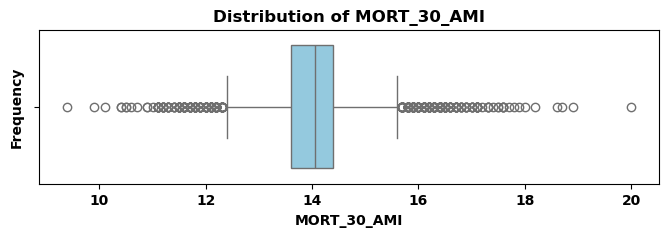

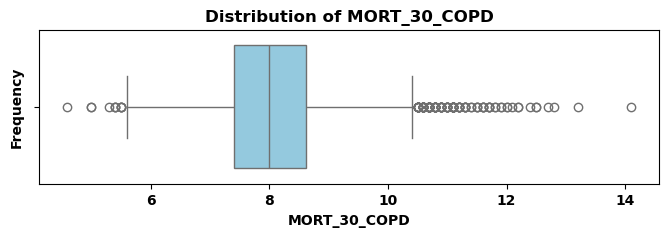

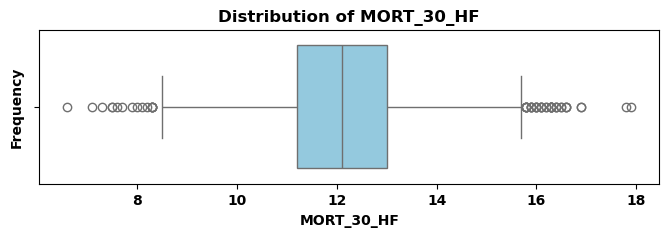

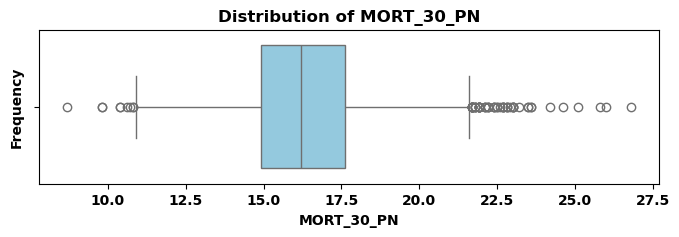

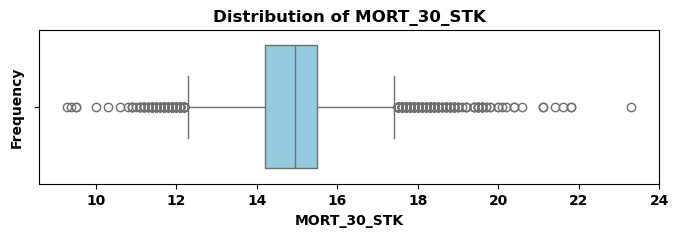

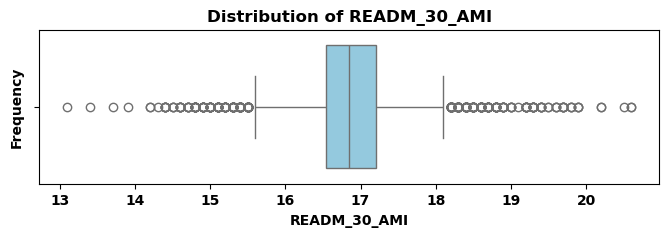

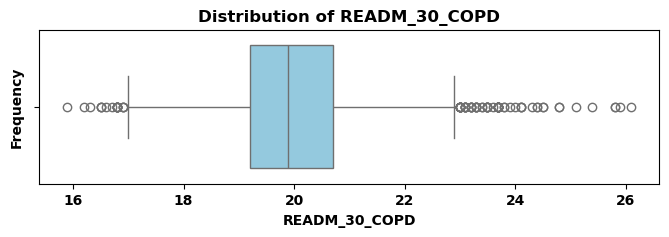

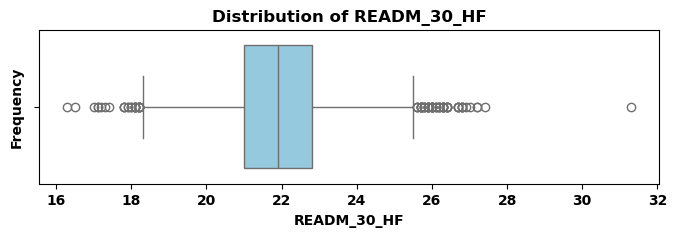

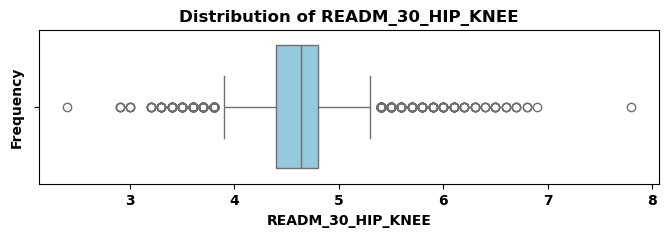

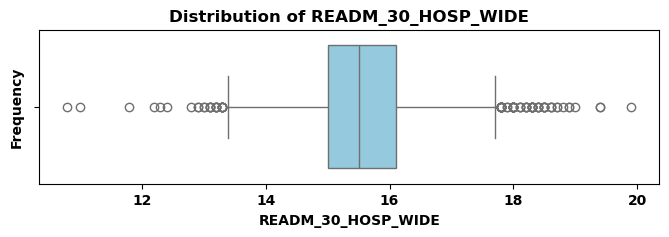

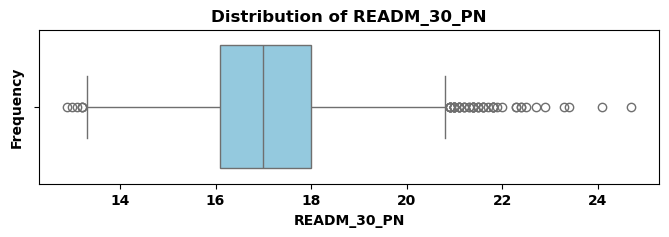

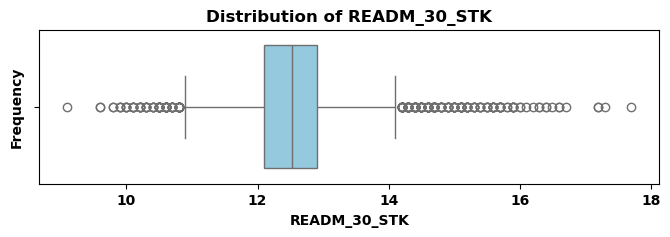

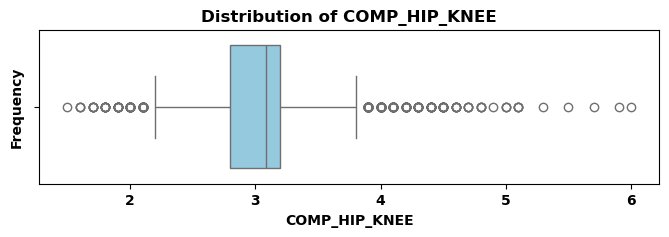

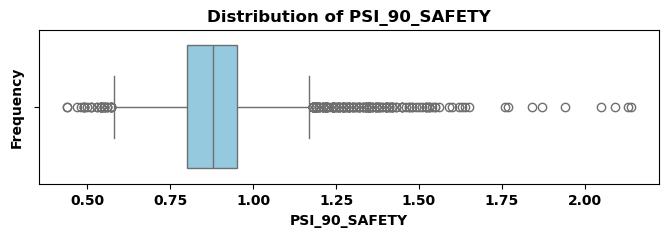

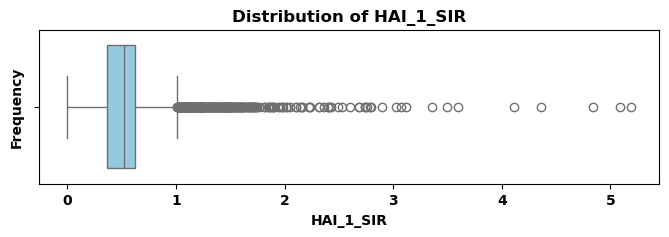

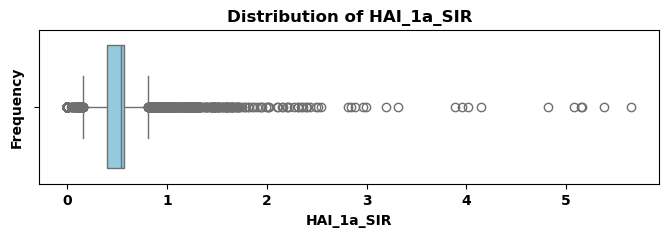

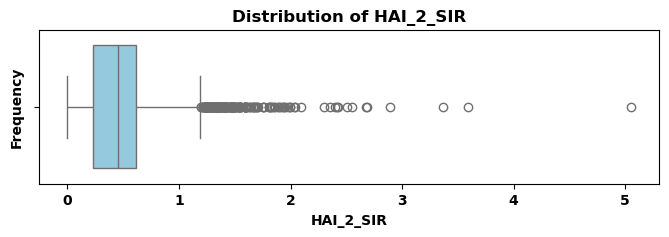

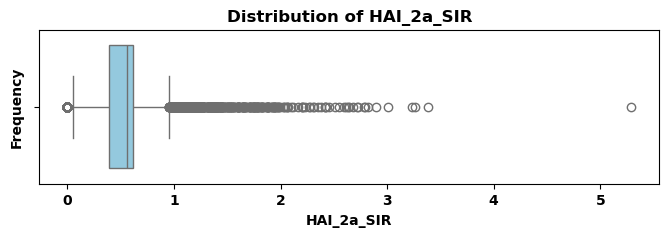

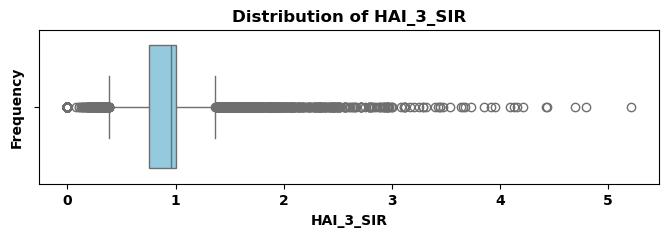

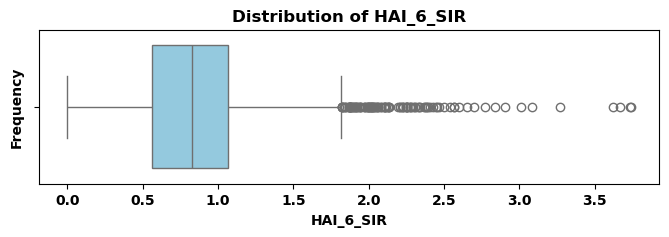

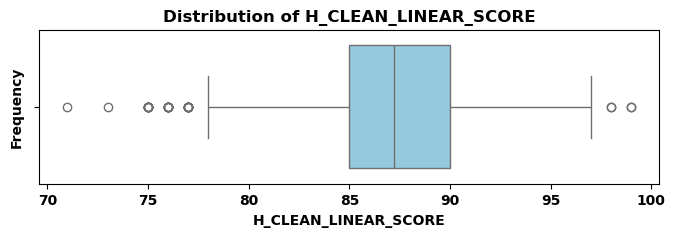

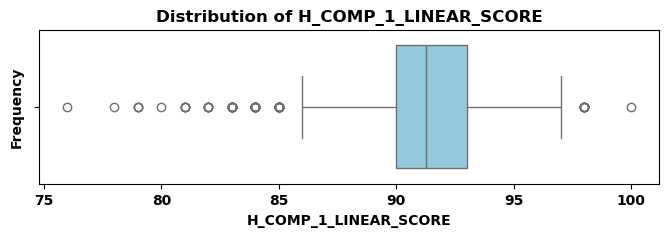

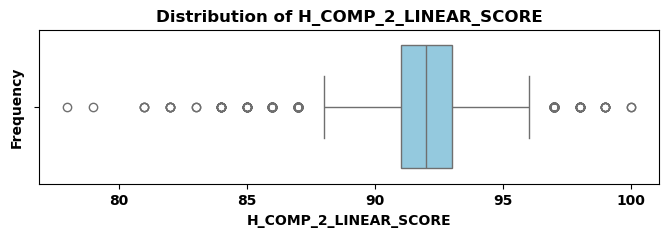

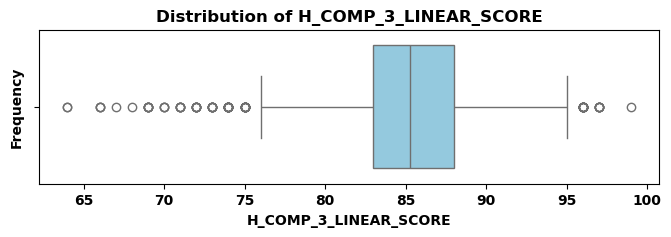

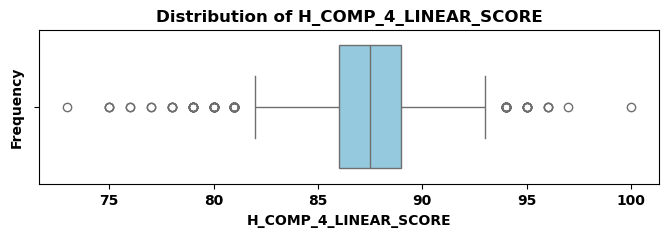

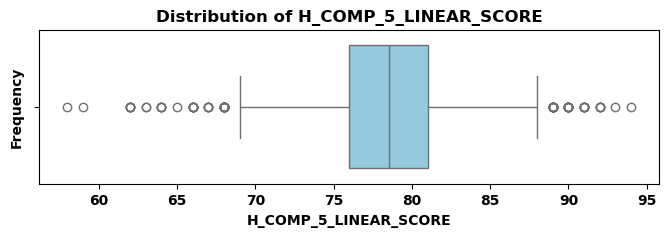

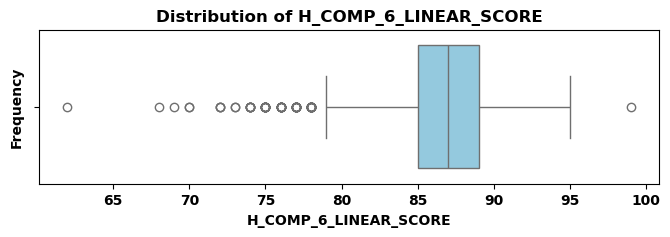

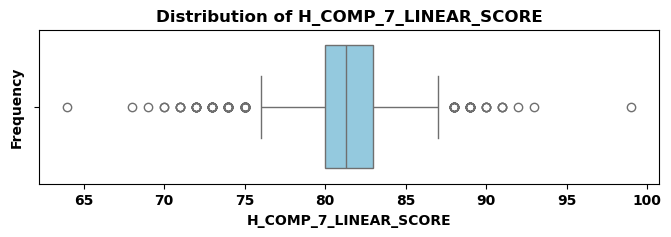

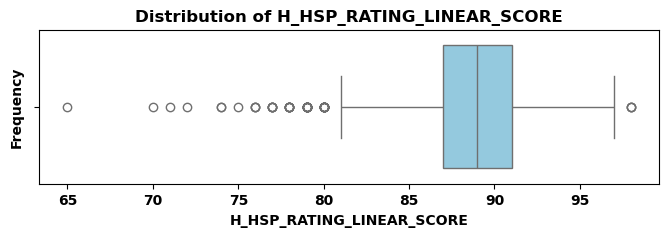

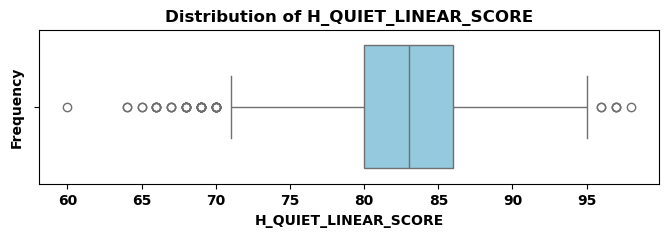

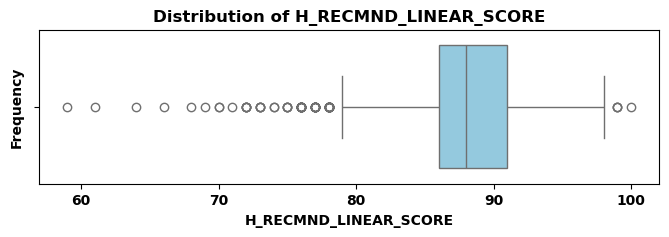

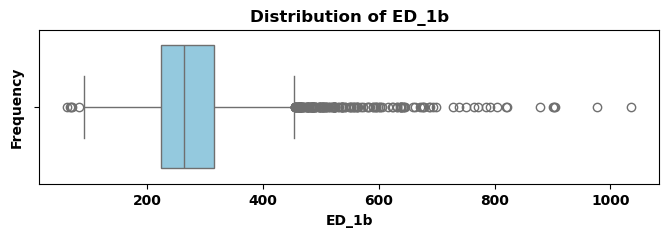

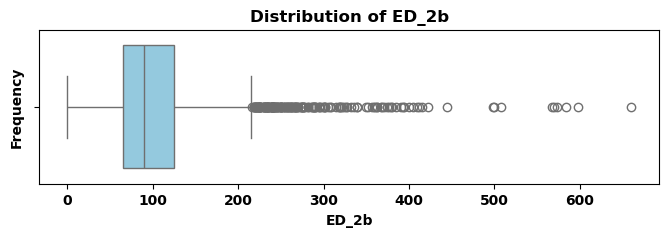

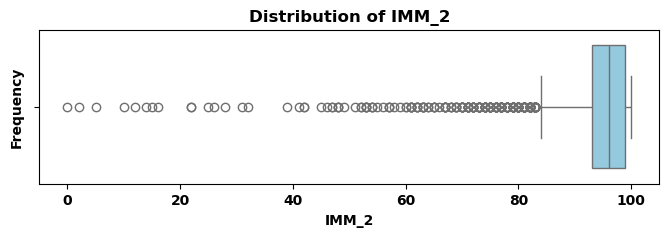

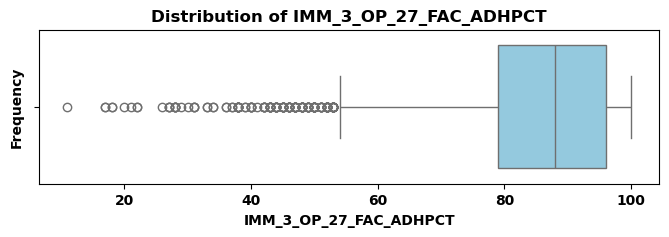

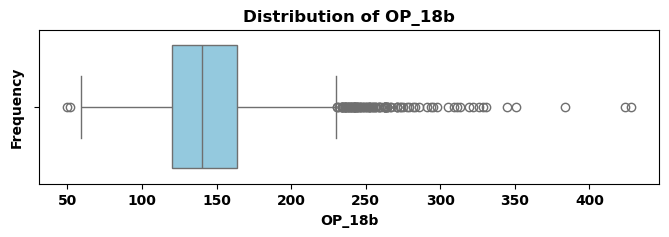

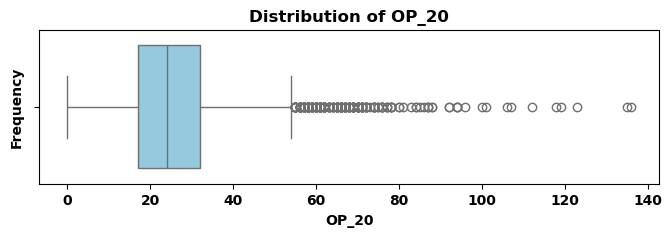

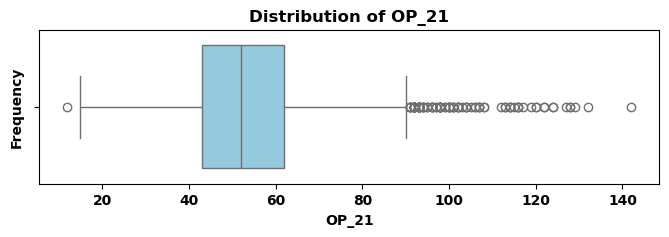

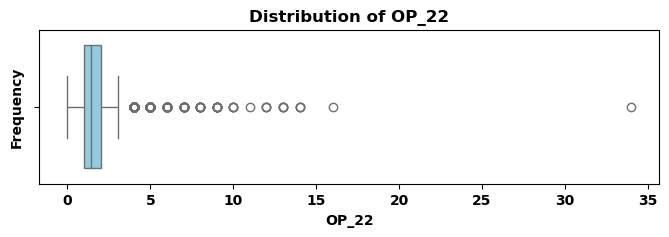

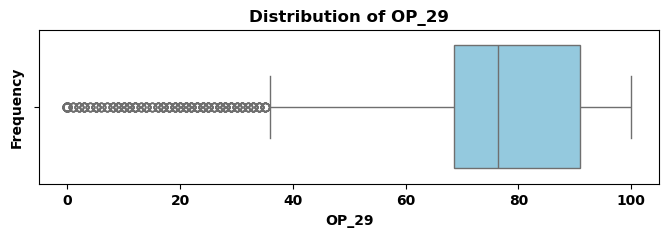

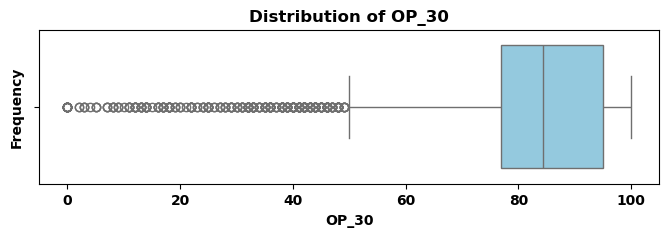

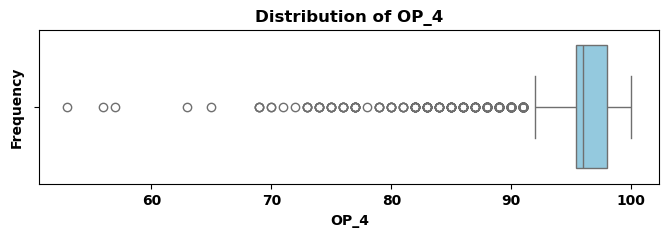

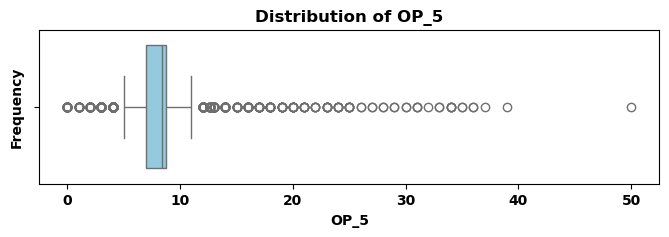

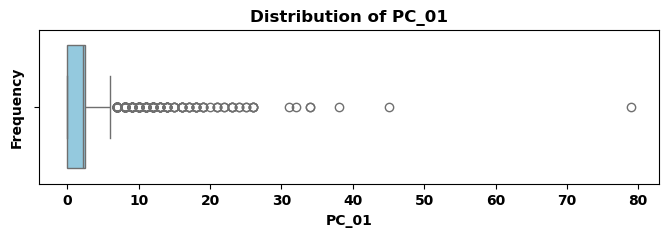

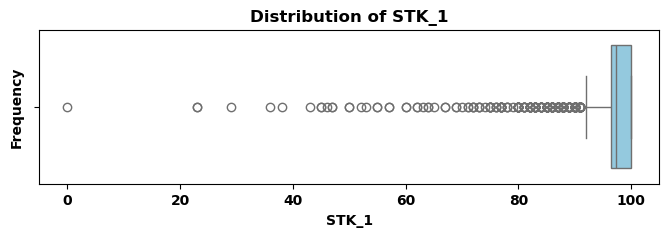

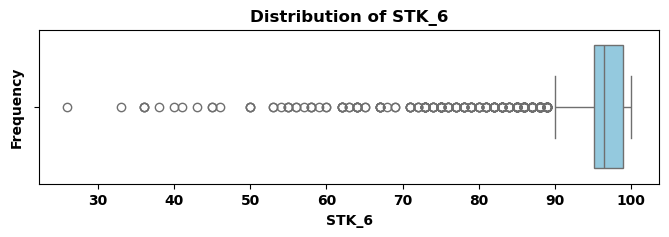

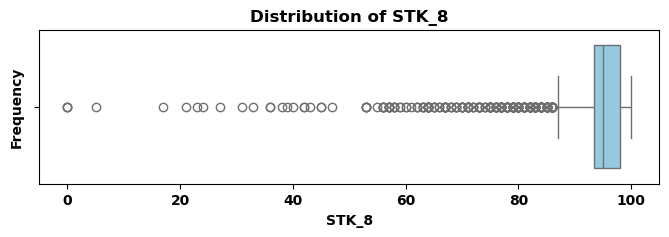

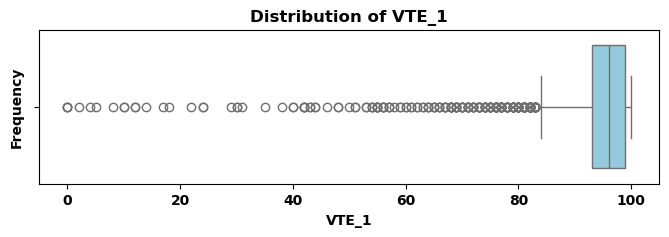

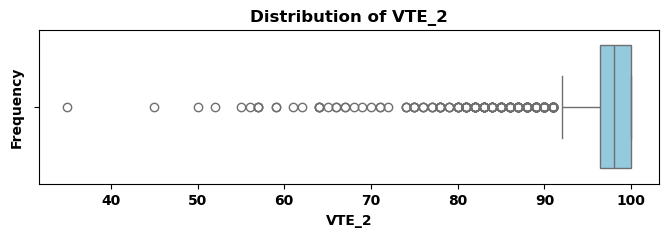

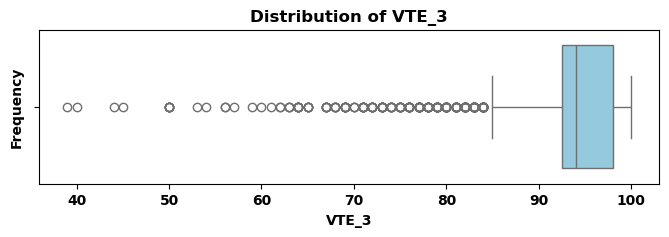

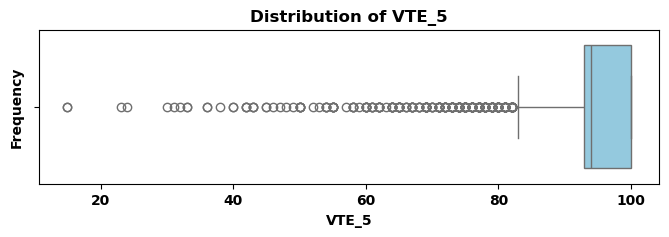

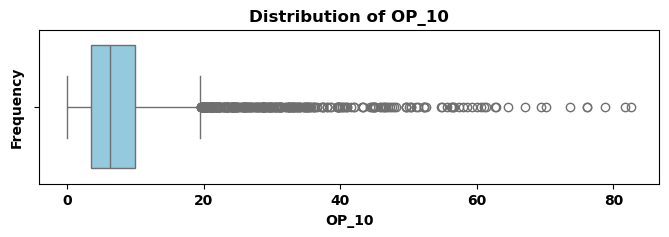

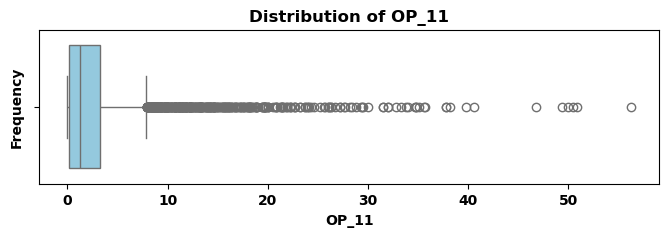

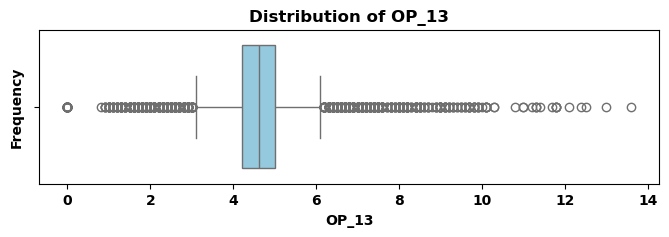

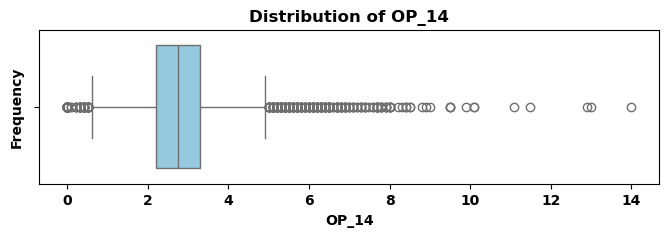

In [105]:
# Visualize distributions of all numeric columns using boxplots
for col in numeric_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=col, data=df_final_master, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

#### *There are outliers and need to be treated as appropriate, we will cap the Outliers at 0.01 and 0.99 percentiles before further analysis*


### Outlier Analysis

In [108]:
# Apply capping at 1st and 99th percentile
for col in numeric_cols:
    lower_bound = df_final_master[col].quantile(0.01)  # 1st percentile
    upper_bound = df_final_master[col].quantile(0.99)  # 99th percentile
    
    # Find the actual min and max before capping
    original_min = df_final_master[col].min()
    original_max = df_final_master[col].max()
    
    # Print details
    print(f"\nColumn: {col}")
    print(f"  - Original Min: {original_min:.2f}, Original Max: {original_max:.2f}")
    print(f"  - Capping at: {lower_bound:.2f} (1%) and {upper_bound:.2f} (99%)")
    
    # Apply the capping
    df_final_master[col] = df_final_master[col].clip(lower=lower_bound, upper=upper_bound)



Column: MORT_30_AMI
  - Original Min: 9.40, Original Max: 20.00
  - Capping at: 11.40 (1%) and 16.90 (99%)

Column: MORT_30_COPD
  - Original Min: 4.60, Original Max: 14.10
  - Capping at: 5.80 (1%) and 11.20 (99%)

Column: MORT_30_HF
  - Original Min: 6.60, Original Max: 17.90
  - Capping at: 8.80 (1%) and 15.80 (99%)

Column: MORT_30_PN
  - Original Min: 8.70, Original Max: 26.80
  - Capping at: 11.90 (1%) and 21.90 (99%)

Column: MORT_30_STK
  - Original Min: 9.30, Original Max: 23.30
  - Capping at: 11.50 (1%) and 19.00 (99%)

Column: READM_30_AMI
  - Original Min: 13.10, Original Max: 20.60
  - Capping at: 14.80 (1%) and 19.20 (99%)

Column: READM_30_COPD
  - Original Min: 15.90, Original Max: 26.10
  - Capping at: 17.15 (1%) and 23.50 (99%)

Column: READM_30_HF
  - Original Min: 16.30, Original Max: 31.30
  - Capping at: 18.45 (1%) and 26.00 (99%)

Column: READM_30_HIP_KNEE
  - Original Min: 2.40, Original Max: 7.80
  - Capping at: 3.50 (1%) and 6.10 (99%)

Column: READM_30_HOSP

#### 3.6 Bi-Variate Analysis

Text(0.5, 1.0, 'Distribution of hospital_overall_rating')

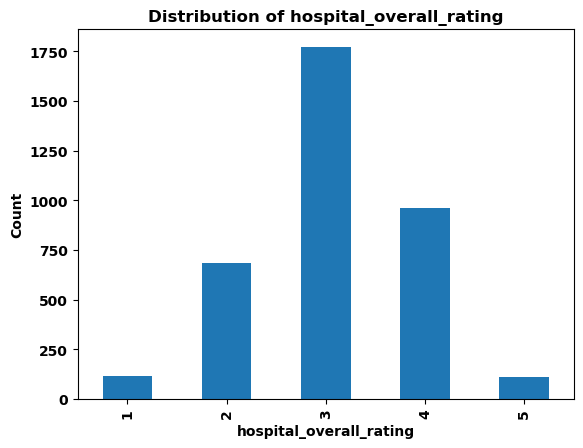

In [110]:
#Distribution of overall rating
df_final_master.groupby('hospital_overall_rating').size().plot(kind='bar')
plt.ylabel('Count')
plt.title("Distribution of hospital_overall_rating")


### *Distribution looks as expected, 1 and 5 have least number of hospital while 3 has the highest number of hospital rated*

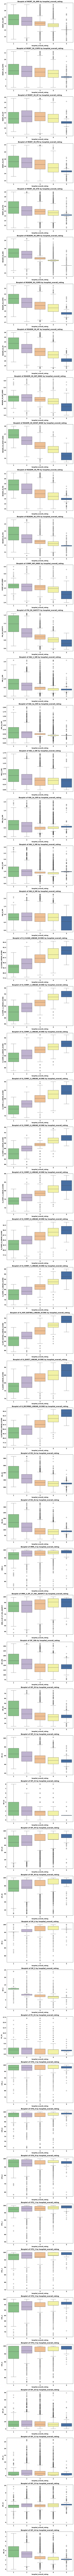

In [112]:
# Create subplots | BoxPlots of all columns
fig, axes = plt.subplots(nrows=len(numeric_cols), figsize=(8, 5 * len(numeric_cols)))

# Define category order
rating_order = [1, 2, 3, 4, 5]  # Explicit order

# Iterate through each column and create a box plot
for i, col in enumerate(numeric_cols):
    sns.boxplot(x='hospital_overall_rating', y=col, data=df_final_master, palette='Accent', ax=axes[i], order=rating_order)
    axes[i].set_title(f'Boxplot of {col} by hospital_overall_rating')
    axes[i].set_xlabel('hospital_overall_rating')
    axes[i].set_ylabel(col)

# Adjust layout
plt.tight_layout()
plt.show()

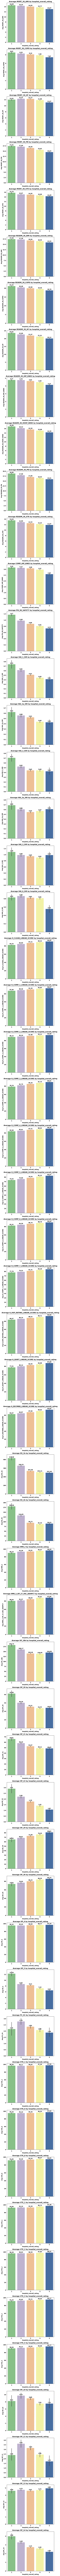

In [113]:
# Create subplots | Column charts of all columns
fig, axes = plt.subplots(nrows=len(numeric_cols), figsize=(6, 5 * len(numeric_cols)))

# Define category order
rating_order = [1, 2, 3, 4, 5]  # Explicit order

# Iterate through each numeric column and create column charts
for i, col in enumerate(numeric_cols):
    sns.barplot(x='hospital_overall_rating', y=col, data=df_final_master, palette='Accent', ax=axes[i], order=rating_order, estimator='mean')
    
    # Add labels
    axes[i].set_title(f'Average {col} by hospital_overall_rating')
    axes[i].set_xlabel('hospital_overall_rating')
    axes[i].set_ylabel(f'Avg {col}')
    
    # Display values on bars
    for p in axes[i].containers:
        axes[i].bar_label(p, fmt="%.2f", padding=3)


# Adjust layout
plt.tight_layout()
plt.show()

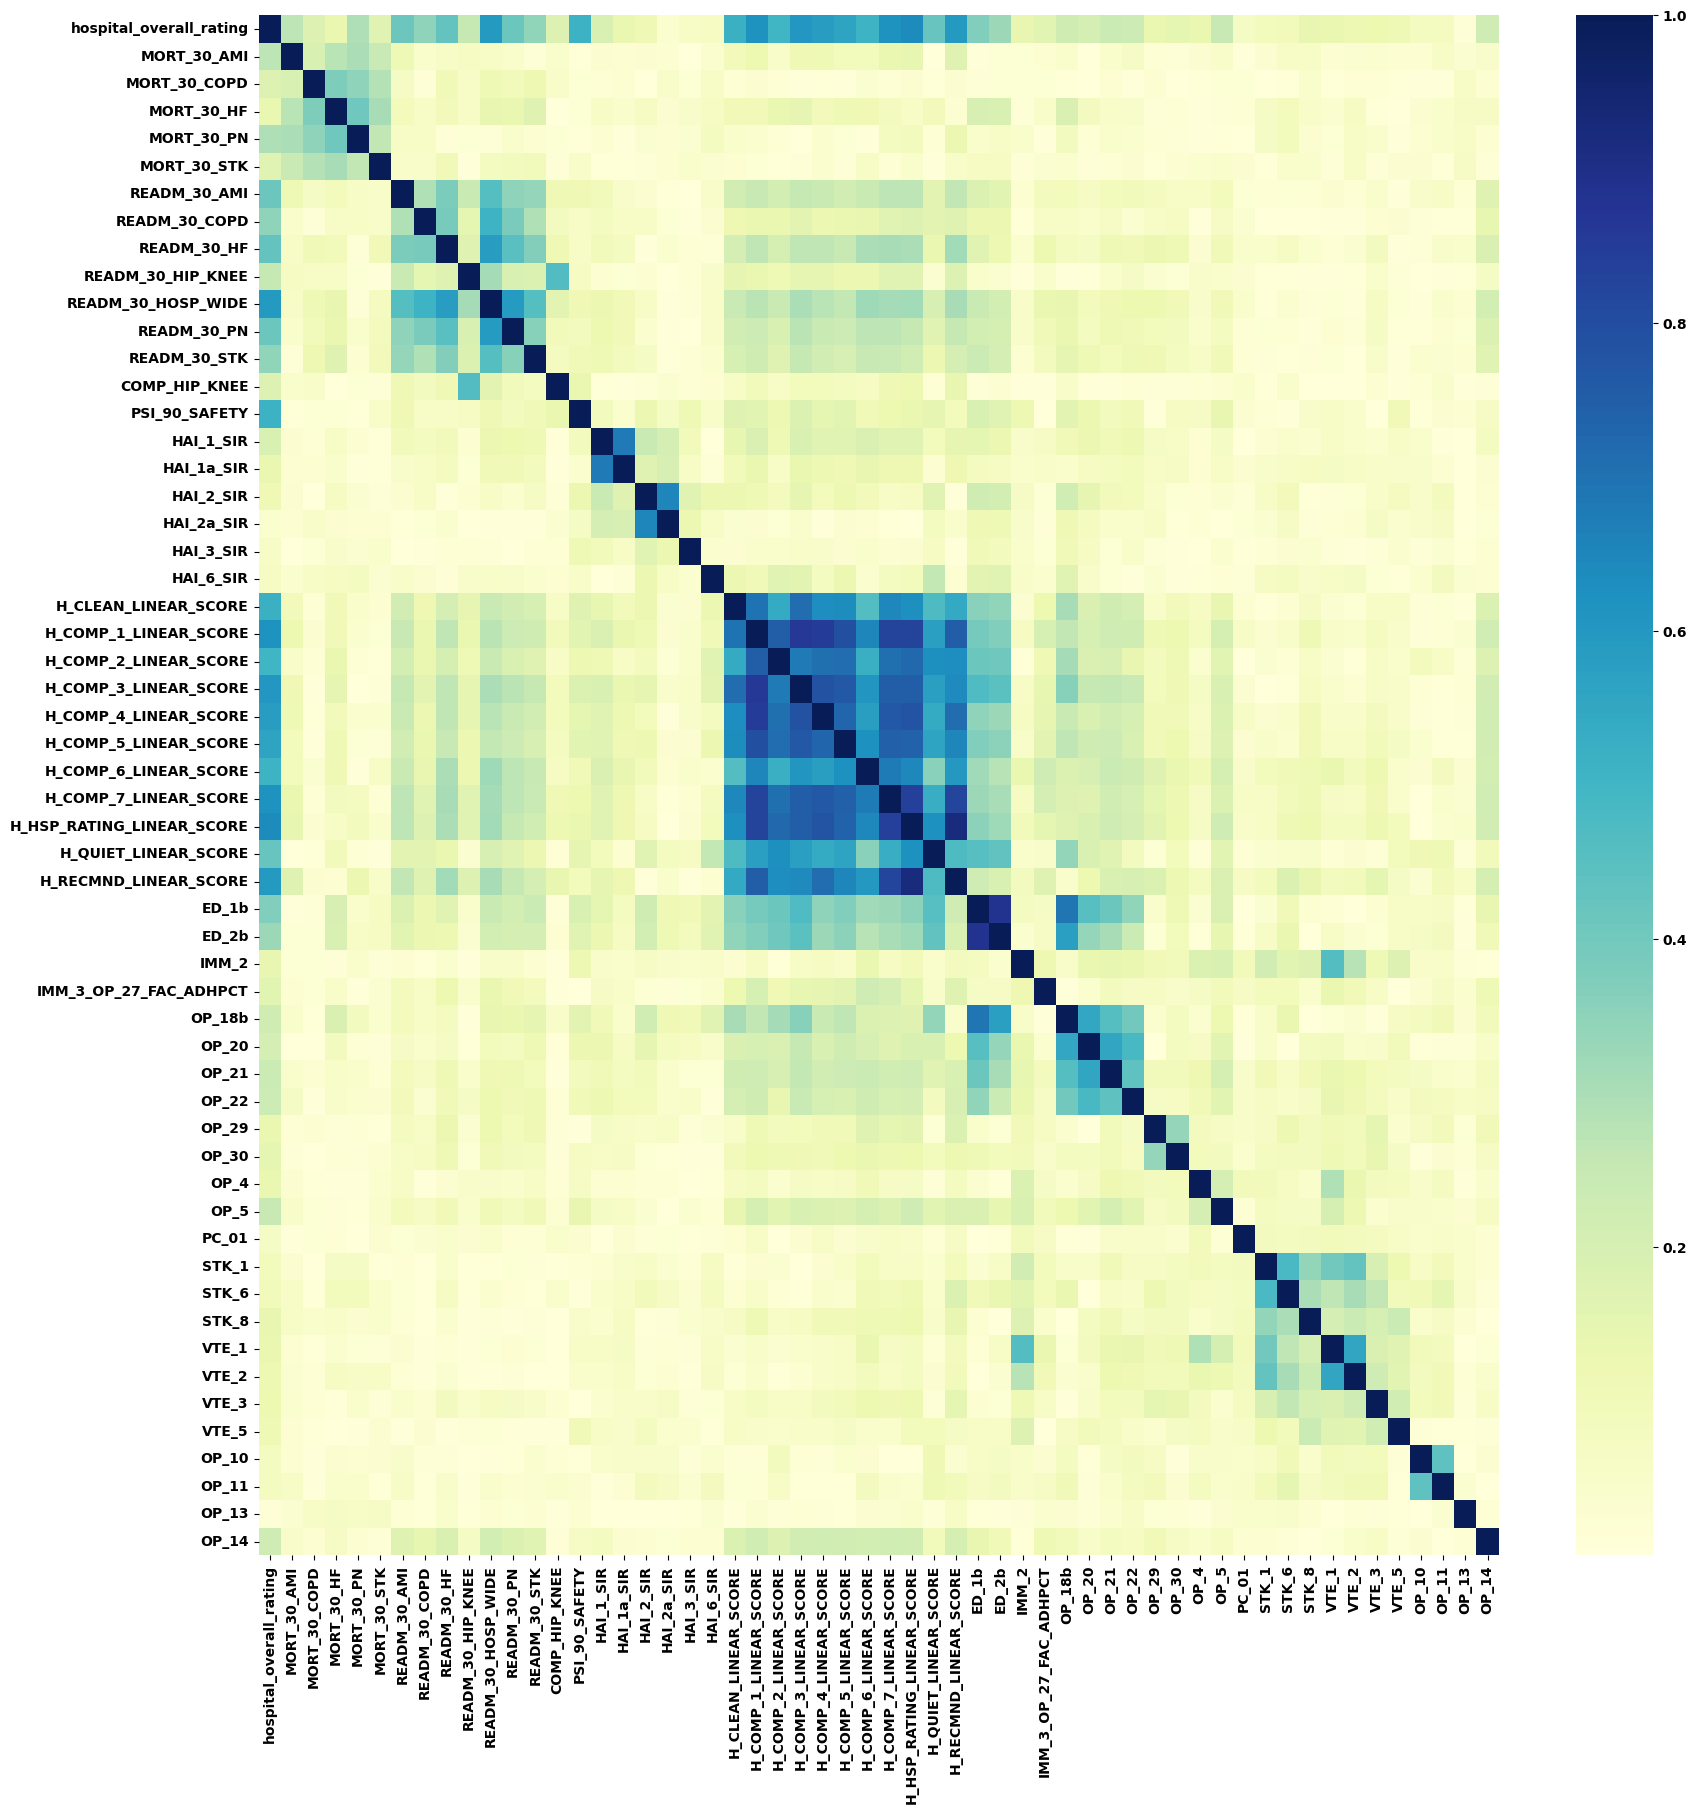

In [114]:
#plot correlation among variables
corr = df_final_master.corr().abs()

plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap="YlGnBu")
plt.show()

# 4. Modelling

In [116]:
#imprting the required libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot

In [117]:
#dataset for model building
df_merged = df_final_master.copy()
df_merged = df_merged.reset_index(drop = True)
df_merged.head()

hospital_overall_rating  MORT_30_AMI  MORT_30_COPD  MORT_30_HF  MORT_30_PN  \
0                       3    12.500000           9.3        12.4        15.5   
1                       3    16.000000           7.6        15.5        20.8   
2                       2    16.700000           7.1        15.6        18.2   
3                       3    14.057596           9.3        14.4        18.8   
4                       3    14.057596           8.2        12.7        15.7   

   MORT_30_STK  READM_30_AMI  READM_30_COPD  READM_30_HF  READM_30_HIP_KNEE  \
0    15.400000     16.500000           21.1         21.4           5.100000   
1    15.500000     16.700000           18.0         21.9           5.700000   
2    17.900000     16.100000           19.8         20.6           5.000000   
3    16.600000     16.843096           19.9         21.1           4.640845   
4    14.954805     16.843096           19.2         23.1           4.640845   

   READM_30_HOSP_WIDE  READM_30_PN  READM_30_STK  COMP_HIP_KNEE  \
0                15.4         18.7     12.700000       3.800000   
1                14.9         16.4     13.400000       3.000000   
2                15.4         17.9     12.000000       3.800000   
3                16.6         17.3     12.700000       3.085083   
4                15.7         16.0     12.526532       3.085083   

   PSI_90_SAFETY  HAI_1_SIR  HAI_1a_SIR  HAI_2_SIR  HAI_2a_SIR  HAI_3_SIR  \
0           0.68   1.740000    2.015530   1.427000     2.06406   1.870000   
1           0.85   1.062000    0.648000   0.456000     0.69800   0.386000   
2           0.91   0.341000    0.443000   0.641000     0.80100   0.310000   
3           0.79   0.516028    0.532603   0.000000     0.55586   0.953985   
4           0.90   0.516028    0.532603   0.451126     0.55586   0.953985   

   HAI_6_SIR  H_CLEAN_LINEAR_SCORE  H_COMP_1_LINEAR_SCORE  \
0      0.787             84.000000               90.00000   
1      0.405             83.000000               91.00000   
2      0.513             83.000000               91.00000   
3      0.000             89.000000               91.00000   
4      0.585             87.204734               91.24888   

   H_COMP_2_LINEAR_SCORE  H_COMP_3_LINEAR_SCORE  H_COMP_4_LINEAR_SCORE  \
0              92.000000              80.000000              86.000000   
1              94.000000              84.000000              88.000000   
2              94.000000              83.000000              87.000000   
3              96.000000              87.000000              89.000000   
4              91.878439              85.254639              87.503519   

   H_COMP_5_LINEAR_SCORE  H_COMP_6_LINEAR_SCORE  H_COMP_7_LINEAR_SCORE  \
0               77.00000              87.000000              82.000000   
1               80.00000              88.000000              81.000000   
2               78.00000              83.000000              80.000000   
3               82.00000              86.000000              82.000000   
4               78.53231              86.776711              81.301983   

   H_HSP_RATING_LINEAR_SCORE  H_QUIET_LINEAR_SCORE  H_RECMND_LINEAR_SCORE  \
0                  89.000000             88.000000              90.000000   
1                  90.000000             86.000000              89.000000   
2                  85.000000             86.000000              84.000000   
3                  87.000000             92.000000              86.000000   
4                  88.512476             82.930902              87.646193   

   ED_1b  ED_2b  IMM_2  IMM_3_OP_27_FAC_ADHPCT  OP_18b  OP_20  OP_21  OP_22  \
0  269.0   68.0   97.0                    81.0   196.0   65.0   99.0    4.0   
1  243.0   71.0   99.0                    83.0   117.0   27.0   60.0    2.0   
2  217.0   78.0  100.0                    87.0   133.0   10.0   58.0    1.0   
3  219.0   68.0   99.0                    53.0   119.0   38.0   90.0    1.0   
4  180.0   56.0   95.0                    43.0    98.0   27.0   4

In [118]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hospital_overall_rating    3648 non-null   object 
 1   MORT_30_AMI                3648 non-null   float64
 2   MORT_30_COPD               3648 non-null   float64
 3   MORT_30_HF                 3648 non-null   float64
 4   MORT_30_PN                 3648 non-null   float64
 5   MORT_30_STK                3648 non-null   float64
 6   READM_30_AMI               3648 non-null   float64
 7   READM_30_COPD              3648 non-null   float64
 8   READM_30_HF                3648 non-null   float64
 9   READM_30_HIP_KNEE          3648 non-null   float64
 10  READM_30_HOSP_WIDE         3648 non-null   float64
 11  READM_30_PN                3648 non-null   float64
 12  READM_30_STK               3648 non-null   float64
 13  COMP_HIP_KNEE              3648 non-null   float

In [119]:
df_merged.shape

(3648, 56)

### 4.1 - Train test Split

In [121]:
# Train Test Split

# features variables in X
X = df_merged.drop(['hospital_overall_rating'], axis=1)

# Target variable in y
y = df_merged['hospital_overall_rating'].astype(int)

# Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)


### 4.2 - Feature scaling

In [123]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data, and scale the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame and preserve the column names
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [124]:
X_train.head()

MORT_30_AMI  MORT_30_COPD  MORT_30_HF  MORT_30_PN  MORT_30_STK  \
0     0.050718     -0.154320   -1.008587   -0.925733    -1.083924   
1     0.497121     -1.009577    0.703158   -0.635192     0.722933   
2     0.050718      0.510880    0.061254    0.430125     0.217013   
3     1.808870      2.506480    0.774481   -0.344651     0.144738   
4     1.304351     -0.534434    1.059772   -0.199381    -1.951215   

   READM_30_AMI  READM_30_COPD  READM_30_HF  READM_30_HIP_KNEE  \
0     -0.009429      -0.636709    -0.223686           0.047150   
1     -0.335164       0.178376     0.178693           1.244784   
2     -0.009429      -0.962742    -0.156623          -0.254521   
3      0.200814       0.585918     0.514008          -0.682893   
4     -0.871141      -0.799725    -0.827254          -0.040334   

   READM_30_HOSP_WIDE  READM_30_PN  READM_30_STK  COMP_HIP_KNEE  \
0           -0.103562     1.207446     -0.147118       0.071167   
1           -1.151077     0.657855      2.173118       1.174334   
2           -0.103562     0.726554     -0.810043       0.745850   
3            0.245610     1.276145      0.626294       0.531608   
4           -1.267468    -1.265713      0.184344      -1.396569   

   PSI_90_SAFETY  HAI_1_SIR  HAI_1a_SIR  HAI_2_SIR  HAI_2a_SIR  HAI_3_SIR  \
0      -1.278721  -0.914250   -1.245642   2.061542    1.707657   2.323767   
1       0.615155  -0.606412   -1.493136   1.537730    3.844989   0.645220   
2       0.027400  -1.441181    0.095009  -1.317892   -1.450646  -0.013609   
3       0.680461   0.314330   -0.389849  -0.346305    0.645482  -0.276403   
4       1.790664   0.547289    0.197577  -1.317892   -1.450646   0.571631   

   HAI_6_SIR  H_CLEAN_LINEAR_SCORE  H_COMP_1_LINEAR_SCORE  \
0   0.247565             -2.531443              -3.180199   
1   0.342226              0.768295               1.616979   
2  -0.386444              1.593230               0.744765   
3   0.841948             -0.606596              -0.999664   
4   0.115480             -0.331618               0.308657   

   H_COMP_2_LINEAR_SCORE  H_COMP_3_LINEAR_SCORE  H_COMP_4_LINEAR_SCORE  \
0              -1.716505              -2.791533              -2.343715   
1               1.417654               0.463198               1.472880   
2               0.074443               0.713562               0.624748   
3              -0.821031              -1.289350              -0.647450   
4              -0.373294               0.212834               1.048814   

   H_COMP_5_LINEAR_SCORE  H_COMP_6_LINEAR_SCORE  H_COMP_7_LINEAR_SCORE  \
0              -1.434940              -1.157931              -1.708007   
1               1.351059               0.644652               2.121522   
2               0.591241               1.245513               0.206758   
3              -0.675122              -0.557070              -0.176195   
4               0.084696              -0.256639               0.972663   

   H_HSP_RATING_LINEAR_SCORE  H_QUIET_LINEAR_SCORE  H_RECMND_LINEAR_SCORE  \
0                  -2.243833             -2.074876              -2.000153   
1                   1.132375              1.305366               1.259994   
2                   1.132375              1.094101               0.507652   
3                  -0.218108             -1.863611               0.006091   
4                   0.794754              0.460306               1.009213   

      ED_1b     ED_2b     IMM_2  IMM_3_OP_27_FAC_ADHPCT    OP_18b     OP_20  \
0  3.947492  3.121623  0.513915               -0.566379  1.864514  2.033109   
1 -0.324213 -0.658685  0.248201               -0.928249 -0.599998 -0.877928   
2 -0.552536 -0.502617  0.248201               -0.204509 -0.518751 -0.323445   
3  1.171306  0.364426  0.513915               -0.204509 -0.193760 -1.571033   
4 -0.666698 -0.329209  0.779628                1.098223  0.239561 -0.808618   

      OP_21     OP_22     OP_29     OP_30      OP_4      OP_5     PC_01  \
0  3.056847  2.878810  0.015329 -0.025282  0.508754 -0.

### 

### 4.3 Handling Class Imbalance

### *Handling class imbalance the 1,5 classes are minority classes and the given the models we are using which is sensitive to class imbalance, its handled using SMOTE technique*

#### Informed Over-Sampling: Synthetic Minority Over-Sampling Technique (SMOTE)  

- A subset of the minority class is selected, and new synthetic instances are generated based on existing examples.  
- These synthetic samples are added to the original dataset to balance the class distribution.  
- The enhanced dataset is then used to train classification models.  
- Effectively addresses class imbalance, improving model performance on underrepresented classes.  
- Prevents overfitting by generating new data points instead of duplicating existing instances, unlike random oversampling.  
- Ensures no loss of valuable information during the resampling process.  

In [128]:
#plot the distribution as %
round(df_merged['hospital_overall_rating'].value_counts(normalize = True)*100,2)

hospital_overall_rating
3    48.57
4    26.43
2    18.75
1     3.21
5     3.04
Name: proportion, dtype: float64

Class=3, n=1223 (47.904%)
Class=4, n=679 (26.596%)
Class=2, n=489 (19.154%)
Class=5, n=77 (3.016%)
Class=1, n=85 (3.329%)


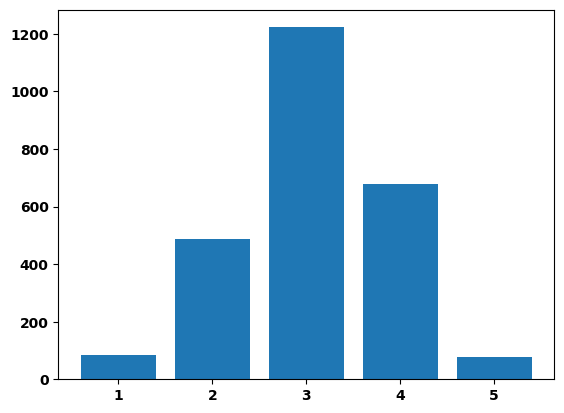

In [129]:
# Plot the Original counts of each class
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [130]:
# Apllying SMOTE for treating class imbalance
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=45, k_neighbors=5)
X_resampled, y_resampled = oversample.fit_resample(X_train, y_train)

print (X_train.shape , y_train.shape)
print (X_resampled.shape , y_resampled.shape)

(2553, 55) (2553,)
(6115, 55) (6115,)


Class=3, n=1223 (20.000%)
Class=4, n=1223 (20.000%)
Class=2, n=1223 (20.000%)
Class=5, n=1223 (20.000%)
Class=1, n=1223 (20.000%)


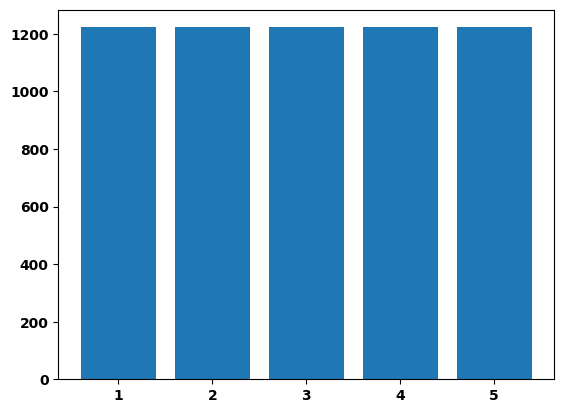

In [131]:
# Plot the counts of each class after resmapling
counter = Counter(y_resampled)
for k,v in counter.items():
    per = v / len(y_resampled) * 100
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

####
### 4.4 Model Building using the resampled dataset

####
#### Multiclass Logistic Regression Model (OvR)

In [134]:
# importing required libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import sklearn.preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


#### Logistic Regression Model with Resampled Data

In [136]:
# importing logistic regression model
from sklearn.linear_model import LogisticRegressionCV
logreg = LogisticRegressionCV(random_state=42, cv=5, multi_class='ovr')
logreg.fit(X_resampled, y_resampled)

LogisticRegressionCV(cv=5, multi_class='ovr', random_state=42)

In [137]:
y_resampled_pred = logreg.predict(X_resampled)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_resampled, y_resampled_pred)

0.8302534750613246

#### Classification Report

In [139]:
print(classification_report(y_resampled, y_resampled_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00      1223
           2       0.76      0.79      0.77      1223
           3       0.63      0.56      0.59      1223
           4       0.75      0.80      0.78      1223
           5       1.00      1.00      1.00      1223

    accuracy                           0.83      6115
   macro avg       0.83      0.83      0.83      6115
weighted avg       0.83      0.83      0.83      6115



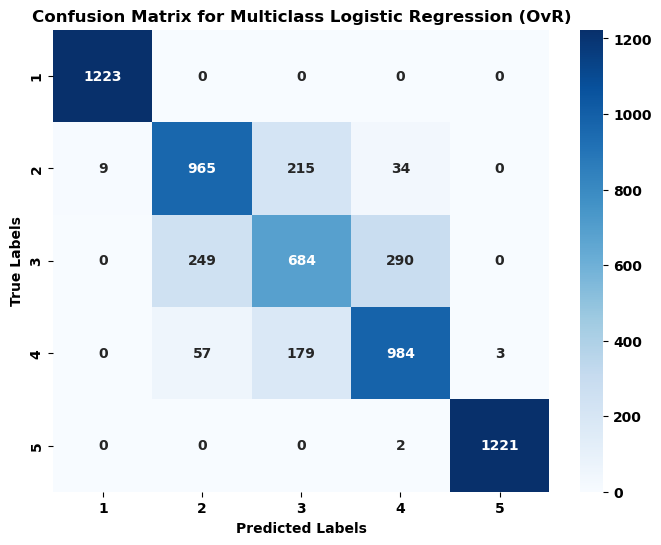

In [140]:
#Confusion Matrix
cm = confusion_matrix(y_resampled, y_resampled_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Multiclass Logistic Regression (OvR)")
plt.show()

### *The model seem to be not working well with class 3*

### Evaluation on the test Dataset

In [143]:
#Predicting the test set
y_test_pred = logreg.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.6429223744292237

In [144]:
#Classification Report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.83      0.91      0.87        32
           2       0.54      0.68      0.60       195
           3       0.74      0.56      0.64       549
           4       0.57      0.71      0.63       285
           5       0.80      0.94      0.86        34

    accuracy                           0.64      1095
   macro avg       0.69      0.76      0.72      1095
weighted avg       0.66      0.64      0.64      1095



In [145]:
# Displaying the model performance scores
print ('Model: ', "Logistic Regression with OVR" )
print ('Accuracy: ', metrics.accuracy_score(y_test, y_test_pred))
print ('F1 score: ', metrics.f1_score(y_test, y_test_pred,labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn'))
print ('Recall: ', metrics.recall_score(y_test, y_test_pred, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn'))
print ('Precision: ', metrics.precision_score(y_test, y_test_pred,labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn'))

Model:  Logistic Regression with OVR
Accuracy:  0.6429223744292237
F1 score:  0.7201947479940162
Recall:  0.7601913994398007
Precision:  0.6945807536485253


#### Creating a function to store the model perfromance results

In [147]:
# Initialize the results dataframe globally
model_performance_df = pd.DataFrame(columns=["Model", "Accuracy", "F1 Score", "Recall", "Precision"])

# Function to append model performance
def get_model_performance(model_name, y_test, y_test_pred):
    global model_performance_df
    
    # Calculate performance metrics
    accuracy = metrics.accuracy_score(y_test, y_test_pred)
    f1 = metrics.f1_score(y_test, y_test_pred, labels=None, pos_label=1, average='macro')
    recall = metrics.recall_score(y_test, y_test_pred, labels=None, pos_label=1, average='macro')
    precision = metrics.precision_score(y_test, y_test_pred, labels=None, pos_label=1, average='macro')
    
    # Create a new row with the results
    new_row = pd.DataFrame({
        "Model": [model_name],
        "Accuracy": [accuracy],
        "F1 Score": [f1],
        "Recall": [recall],
        "Precision": [precision]
    })
    
    # Concatenate the new row to the existing dataframe
    model_performance_df = pd.concat([model_performance_df, new_row], ignore_index=True)

    return new_row

In [148]:
#Getting the performance score and storing the scores in the dataframe
get_model_performance("Logistic Regression with OVR - Train", y_resampled, y_resampled_pred)


Model  Accuracy  F1 Score    Recall  \
0  Logistic Regression with OVR - Train  0.830253  0.827923  0.830253   

   Precision  
0   0.827028

In [149]:
#Getting the performance score and storing the scores in the dataframe
get_model_performance("Logistic Regression with OVR - Test", y_test, y_test_pred)

Model  Accuracy  F1 Score    Recall  \
0  Logistic Regression with OVR - Test  0.642922  0.720195  0.760191   

   Precision  
0   0.694581

### *Logistic regression model seemed to have worked fairly well on training data, however the perfomance on the test data is not satisfactory.*
### *Firthermore, the model clearly seem to have issues correctly predicting 2,3,4 classes*

###
### Decision Tree Classifier with GridSearchCV

In [152]:
# Imprting the required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

### *Run the decision tree classifier with original train set, without oversampling as the DT has parameters to control class imbalance*

In [154]:
# Defining the parameters
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [155]:
# Initializing a decision tree classifier
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4, class_weight='balanced')

In [156]:
# initializing the gridserachcv 
grid_search = GridSearchCV(estimator=dt_base,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="f1")

In [157]:
%%time
grid_search.fit(X_train, y_train) # fitting the model using GridSearchCV

Fitting 4 folds for each of 30 candidates, totalling 120 fits
CPU times: total: 484 ms
Wall time: 8.56 s


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              max_depth=4, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='f1', verbose=1)

In [158]:
# Checking the best score
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(class_weight='balanced', max_depth=2, min_samples_leaf=5,
                       random_state=42)

In [159]:
# Re-initializing a decision tree classifier
dt_base = DecisionTreeClassifier(class_weight='balanced', max_depth=2, min_samples_leaf=5,random_state=42)
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, min_samples_leaf=5,
                       random_state=42)

In [160]:
# Predicting on the train data and test data
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [161]:
#Train data classification report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           1       0.35      0.74      0.47        85
           2       0.30      0.83      0.44       489
           3       0.00      0.00      0.00      1223
           4       0.53      0.66      0.59       679
           5       0.35      0.82      0.49        77

    accuracy                           0.38      2553
   macro avg       0.31      0.61      0.40      2553
weighted avg       0.22      0.38      0.27      2553



In [162]:
#Test data classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.27      0.72      0.39        32
           2       0.26      0.79      0.40       195
           3       0.00      0.00      0.00       549
           4       0.52      0.64      0.57       285
           5       0.33      0.74      0.45        34

    accuracy                           0.35      1095
   macro avg       0.28      0.58      0.36      1095
weighted avg       0.20      0.35      0.25      1095



In [163]:
#Getting the performance score and storing the scores in the dataframe
get_model_performance("Decision Tree Classifier - Train", y_train, y_train_pred)

Model  Accuracy  F1 Score    Recall  Precision
0  Decision Tree Classifier - Train  0.384646  0.398614  0.610587   0.305476

In [164]:
#Getting the performance score and storing the scores in the dataframe
get_model_performance("Decision Tree Classifier - Test", y_test, y_test_pred)

Model  Accuracy  F1 Score    Recall  Precision
0  Decision Tree Classifier - Test  0.350685  0.362818  0.576801   0.276502

### *The decision tree model does not seem to work well,  this might require hyperparameter tuning. However we'll run a random forest model as thats likely to work well with GridSearchCV.*

###
### Random Forest Classification with GridSearchCV
#### Using data without oversampling

In [167]:
# import the required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
# instantiate a Random forest classsifier
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True, class_weight="balanced")

In [ ]:
#Setting the hyperparamers
hyper_params = {'max_depth': [3, 5, 10, 15],
                'max_features': [3, 5, 7],
                'min_samples_leaf': [20, 50, 100],
                'n_estimators': [20, 50, 80, 100]
               }

In [ ]:
rf_CV = GridSearchCV(estimator=rf, 
             param_grid=hyper_params,
             verbose=1,
             cv=5,
             n_jobs=-1,
             return_train_score=True)

In [171]:
%%time
rf_CV.fit(X_train, y_train)

CPU times: total: 4.8 s
Wall time: 2min 5s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=4, max_features=5,
                                              n_estimators=10, oob_score=True,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15], 'max_features': [3, 5, 7],
                         'min_samples_leaf': [20, 50, 100],
                         'n_estimators': [20, 50, 80, 100]},
             return_train_score=True, verbose=1)

In [172]:
rf_CV.best_score_

0.8554713940370668

In [173]:
rf_best = rf_CV.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=7,
                       min_samples_leaf=20, oob_score=True, random_state=100)

In [174]:
y_train_pred = rf_best.predict(X_train)

In [175]:
accuracy_score(y_train, y_train_pred)

0.9161770466118292

In [176]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           1       0.89      1.00      0.94        85
           2       0.82      0.95      0.88       489
           3       0.98      0.87      0.92      1223
           4       0.91      0.95      0.93       679
           5       0.91      1.00      0.95        77

    accuracy                           0.92      2553
   macro avg       0.90      0.95      0.92      2553
weighted avg       0.92      0.92      0.92      2553



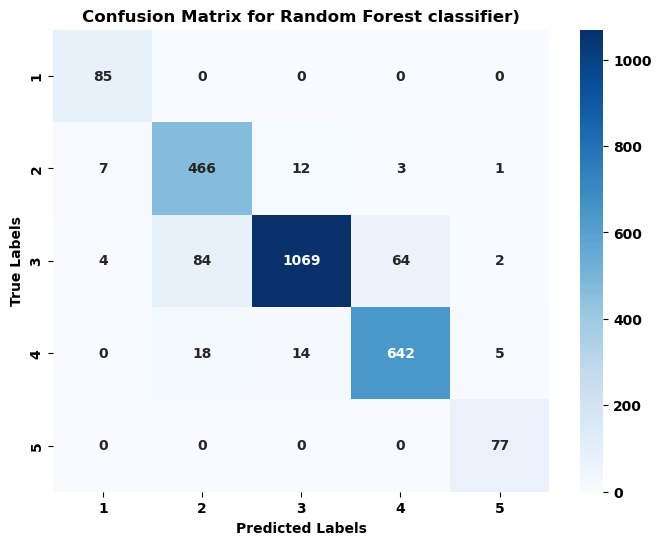

In [177]:
#confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Random Forest classifier)")
plt.show()

#### Evaluate the model on test dataset

In [179]:
#predicting on test set
y_test_pred = rf_best.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.8684931506849315

In [180]:
#Getting the performance score and storing the scores in the dataframe
get_model_performance("Random forest Classifier - Train", y_train, y_train_pred)

Model  Accuracy  F1 Score    Recall  Precision
0  Random forest Classifier - Train  0.916177  0.923801  0.954511   0.898696

In [181]:
#Getting the performance score and storing the scores in the dataframe
get_model_performance("Random forest Classifier - Test", y_test, y_test_pred)

Model  Accuracy  F1 Score    Recall  Precision
0  Random forest Classifier - Test  0.868493  0.836001  0.832296   0.845471

In [182]:
#Displaying the Model performance results of all models
model_performance_df

Model  Accuracy  F1 Score    Recall  \
0  Logistic Regression with OVR - Train  0.830253  0.827923  0.830253   
1   Logistic Regression with OVR - Test  0.642922  0.720195  0.760191   
2      Decision Tree Classifier - Train  0.384646  0.398614  0.610587   
3       Decision Tree Classifier - Test  0.350685  0.362818  0.576801   
4      Random forest Classifier - Train  0.916177  0.923801  0.954511   
5       Random forest Classifier - Test  0.868493  0.836001  0.832296   

   Precision  
0   0.827028  
1   0.694581  
2   0.305476  
3   0.276502  
4   0.898696  
5   0.845471

### *Random forest model shows better accuracy on train and test data, with Train set showing 91% and 86% accuracy on test set. We'll also try to use the oversampled data to see improvements in the score*

###
## Random Forest Classifier with oversmapling SMOTE

In [185]:
%%time
rf_CV.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
CPU times: total: 20.5 s
Wall time: 6min 9s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=4, max_features=5,
                                              n_estimators=10, oob_score=True,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15], 'max_features': [3, 5, 7],
                         'min_samples_leaf': [20, 50, 100],
                         'n_estimators': [20, 50, 80, 100]},
             return_train_score=True, verbose=1)

In [186]:
#determining best score
rf_CV.best_score_

0.9295175797219951

In [187]:
#finding the best estimator
rf_best = rf_CV.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=15, max_features=7,
                       min_samples_leaf=20, n_estimators=80, oob_score=True,
                       random_state=100)

In [188]:
#Predicting on the resmapled data
y_resampled_pred = rf_best.predict(X_resampled)

In [189]:
accuracy_score(y_resampled, y_resampled_pred)

0.9666394112837285

In [190]:
#Print classification report
print(classification_report(y_resampled, y_resampled_pred))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1223
           2       0.93      0.97      0.95      1223
           3       0.96      0.92      0.94      1223
           4       0.97      0.96      0.96      1223
           5       1.00      0.99      0.99      1223

    accuracy                           0.97      6115
   macro avg       0.97      0.97      0.97      6115
weighted avg       0.97      0.97      0.97      6115



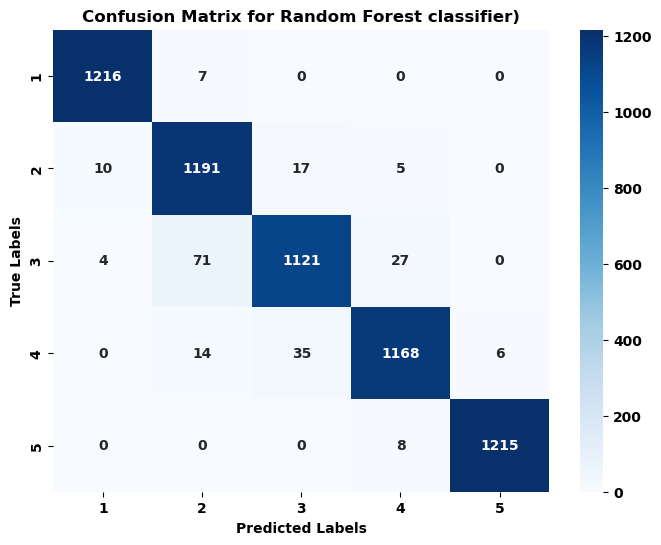

In [191]:
#confusion matrix
cm = confusion_matrix(y_resampled, y_resampled_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Random Forest classifier)")
plt.show()

#### Evaluate the model on test set

In [193]:
#predicting on test set
y_test_pred = rf_best.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.8831050228310502

In [194]:
#getting the model performace score and logging the results in the dataframe
get_model_performance("Random forest Classifier with SMOTE - Train", y_resampled, y_resampled_pred)

Model  Accuracy  F1 Score    Recall  \
0  Random forest Classifier with SMOTE - Train  0.966639  0.966575  0.966639   

   Precision  
0   0.966911

In [195]:
#getting the model performace score and logging the results in the dataframe
get_model_performance("Random forest Classifier with SMOTE - Test ", y_test, y_test_pred)

Model  Accuracy  F1 Score    Recall  \
0  Random forest Classifier with SMOTE - Test   0.883105  0.844832  0.828324   

   Precision  
0    0.87202

###
### Print the final model performance summary

In [197]:
#Print the summary score
model_performance_df

Model  Accuracy  F1 Score    Recall  \
0         Logistic Regression with OVR - Train  0.830253  0.827923  0.830253   
1          Logistic Regression with OVR - Test  0.642922  0.720195  0.760191   
2             Decision Tree Classifier - Train  0.384646  0.398614  0.610587   
3              Decision Tree Classifier - Test  0.350685  0.362818  0.576801   
4             Random forest Classifier - Train  0.916177  0.923801  0.954511   
5              Random forest Classifier - Test  0.868493  0.836001  0.832296   
6  Random forest Classifier with SMOTE - Train  0.966639  0.966575  0.966639   
7  Random forest Classifier with SMOTE - Test   0.883105  0.844832  0.828324   

   Precision  
0   0.827028  
1   0.694581  
2   0.305476  
3   0.276502  
4   0.898696  
5   0.845471  
6   0.966911  
7   0.872020

## Identifying the important features

In [199]:
#Get the features importance from the Random forest model
rf_best.feature_importances_

array([0.03931002, 0.00851066, 0.00614077, 0.00831196, 0.00702554,
       0.07716298, 0.0232817 , 0.02795226, 0.0068845 , 0.07280386,
       0.00628679, 0.01827404, 0.00582432, 0.05290035, 0.00704825,
       0.02563351, 0.00336966, 0.01171821, 0.02279226, 0.00259182,
       0.01868733, 0.0677344 , 0.01253777, 0.04307977, 0.03720869,
       0.01693768, 0.0029918 , 0.03389001, 0.05462886, 0.0033796 ,
       0.03725381, 0.0100025 , 0.00799316, 0.0014387 , 0.00117473,
       0.00474408, 0.00326207, 0.00156563, 0.0017029 , 0.00198697,
       0.00145038, 0.03770056, 0.07900137, 0.00607908, 0.00465356,
       0.00697043, 0.00783356, 0.00226796, 0.00237552, 0.0079296 ,
       0.02152512, 0.00155296, 0.00376703, 0.01088535, 0.0099836 ])

In [200]:
#Convert the features and importance to a datframe
imp_df = pd.DataFrame({
    "Varname": X_resampled.columns,
    "Imp": rf_best.feature_importances_
})

In [201]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
42                       OP_5  0.079001
5                READM_30_AMI  0.077163
9          READM_30_HOSP_WIDE  0.072804
21      H_COMP_1_LINEAR_SCORE  0.067734
28  H_HSP_RATING_LINEAR_SCORE  0.054629
13              PSI_90_SAFETY  0.052900
23      H_COMP_3_LINEAR_SCORE  0.043080
0                 MORT_30_AMI  0.039310
41                       OP_4  0.037701
30      H_RECMND_LINEAR_SCORE  0.037254
24      H_COMP_4_LINEAR_SCORE  0.037209
27      H_COMP_7_LINEAR_SCORE  0.033890
7                 READM_30_HF  0.027952
15                 HAI_1a_SIR  0.025634
6               READM_30_COPD  0.023282
18                  HAI_3_SIR  0.022792
50                      VTE_5  0.021525
20       H_CLEAN_LINEAR_SCORE  0.018687
11               READM_30_STK  0.018274
25      H_COMP_5_LINEAR_SCORE  0.016938
22      H_COMP_2_LINEAR_SCORE  0.012538
17                 HAI_2a_SIR  0.011718
53                      OP_13  0.010885
31                      ED_1b  0.010002
54                      OP_14  0.009984
1                MORT_30_COPD  0.008511
3                  MORT_30_PN  0.008312
32                      ED_2b  0.007993
49                      VTE_3  0.007930
46                      STK_8  0.007834
14                  HAI_1_SIR  0.007048
4                 MORT_30_STK  0.007026
45                      STK_6  0.006970
8           READM_30_HIP_KNEE  0.006885
10                READM_30_PN  0.006287
2                  MORT_30_HF  0.006141
43                      PC_01  0.006079
12              COMP_HIP_KNEE  0.005824
35                     OP_18b  0.004744
44                      STK_1  0.004654
52                      OP_11  0.003767
29       H_QUIET_LINEAR_SCORE  0.003380
16                  HAI_2_SIR  0.003370
36                      OP_20  0.003262
26      H_COMP_6_LINEAR_SCORE  0.002992
19                  HAI_6_SIR  0.002592
48                      VTE_2  0.002376
47                      VTE_1  0.002268
39                      OP_29  0.001987
38                      OP_22  0.001703
37                      OP_21  0.001566
51                      OP_10  0.001553
40                      OP_30  0.001450
33                      IMM_2  0.001439
34     IMM_3_OP_27_FAC_ADHPCT  0.001175

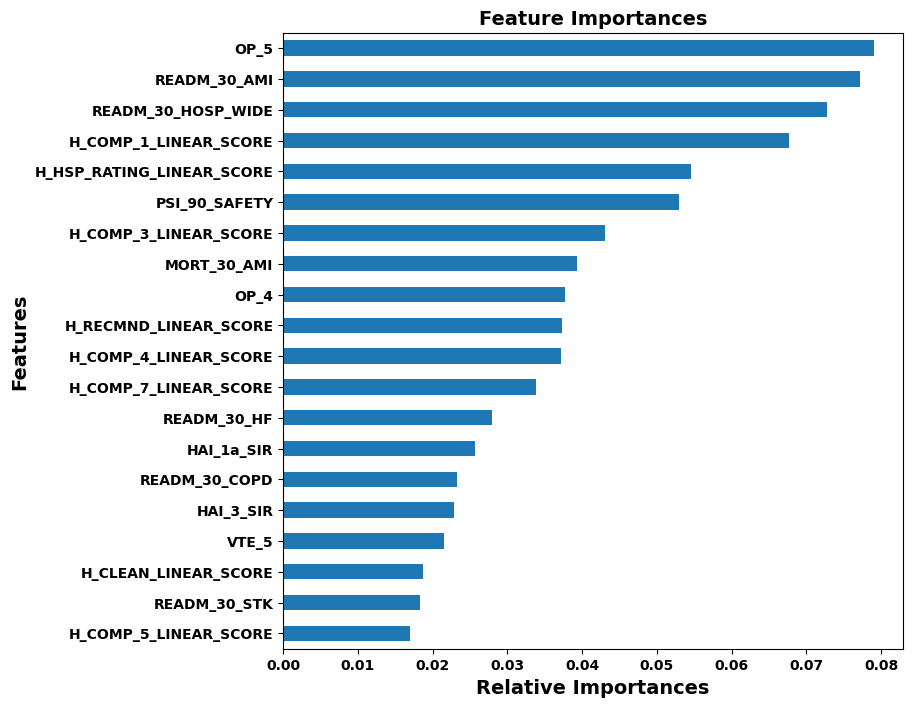

In [202]:
#Plotting the top 20 features
TopN = 20
plt.figure(figsize=(8, 8))
feat_importances = pd.Series(rf_best.feature_importances_, index=X.columns)
feat_importances.nlargest(TopN).sort_values().plot(kind='barh', align='center')
plt.title('Feature Importances', size=14)
plt.xlabel('Relative Importances', size=14)
plt.ylabel('Features', size=14)
plt.show()

In [203]:
#Mapping the measure name to the list
imp_df_final_list = imp_df.merge(df_measures[['measure_id', 'measure_name']], 
                      left_on='Varname', 
                      right_on='measure_id', 
                      how='left')
imp_df_final_list.sort_values(by="Imp", ascending=False)

Varname       Imp                 measure_id  \
42                       OP_5  0.079001                       OP_5   
5                READM_30_AMI  0.077163               READM_30_AMI   
9          READM_30_HOSP_WIDE  0.072804         READM_30_HOSP_WIDE   
21      H_COMP_1_LINEAR_SCORE  0.067734      H_COMP_1_LINEAR_SCORE   
28  H_HSP_RATING_LINEAR_SCORE  0.054629  H_HSP_RATING_LINEAR_SCORE   
13              PSI_90_SAFETY  0.052900              PSI_90_SAFETY   
23      H_COMP_3_LINEAR_SCORE  0.043080      H_COMP_3_LINEAR_SCORE   
0                 MORT_30_AMI  0.039310                MORT_30_AMI   
41                       OP_4  0.037701                       OP_4   
30      H_RECMND_LINEAR_SCORE  0.037254      H_RECMND_LINEAR_SCORE   
24      H_COMP_4_LINEAR_SCORE  0.037209      H_COMP_4_LINEAR_SCORE   
27      H_COMP_7_LINEAR_SCORE  0.033890      H_COMP_7_LINEAR_SCORE   
7                 READM_30_HF  0.027952                READM_30_HF   
15                 HAI_1a_SIR  0.025634                 HAI_1a_SIR   
6               READM_30_COPD  0.023282              READM_30_COPD   
18                  HAI_3_SIR  0.022792                  HAI_3_SIR   
50                      VTE_5  0.021525                      VTE_5   
20       H_CLEAN_LINEAR_SCORE  0.018687       H_CLEAN_LINEAR_SCORE   
11               READM_30_STK  0.018274               READM_30_STK   
25      H_COMP_5_LINEAR_SCORE  0.016938      H_COMP_5_LINEAR_SCORE   
22      H_COMP_2_LINEAR_SCORE  0.012538      H_COMP_2_LINEAR_SCORE   
17                 HAI_2a_SIR  0.011718                 HAI_2a_SIR   
53                      OP_13  0.010885                      OP_13   
31                      ED_1b  0.010002                      ED_1b   
54                      OP_14  0.009984                      OP_14   
1                MORT_30_COPD  0.008511               MORT_30_COPD   
3                  MORT_30_PN  0.008312                 MORT_30_PN   
32                      ED_2b  0.007993                      ED_2b   
49                      VTE_3  0.007930                      VTE_3   
46                      STK_8  0.007834                      STK_8   
14                  HAI_1_SIR  0.007048                  HAI_1_SIR   
4                 MORT_30_STK  0.007026                MORT_30_STK   
45                      STK_6  0.006970                      STK_6   
8           READM_30_HIP_KNEE  0.006885          READM_30_HIP_KNEE   
10                READM_30_PN  0.006287                READM_30_PN   
2                  MORT_30_HF  0.006141                 MORT_30_HF   
43                      PC_01  0.006079                      PC_01   
12              COMP_HIP_KNEE  0.005824              COMP_HIP_KNEE   
35                     OP_18b  0.004744                     OP_18b   
44                      STK_1  0.004654                      STK_1   
52                      OP_11  0.003767                      OP_11   
29       H_QUIET_LINEAR_SCORE  0.003380       H_QUIET_LINEAR_SCORE   
16                  HAI_2_SIR  0.003370                  HAI_2_SIR   
36                      OP_20  0.003262                      OP_20   
26      H_COMP_6_LINEAR_SCORE  0.002992      H_COMP_6_LINEAR_SCORE   
19                  HAI_6_SIR  0.002592                  HAI_6_SIR   
48                      VTE_2  0.002376                      VTE_2   
47                      VTE_1  0.002268                      VTE_1   
39                      OP_29  0.001987                      OP_29   
38                      OP_22  0.001703                      OP_22   
37                      OP_21  0.001566                      OP_21   
51                      OP_10  0.001553                      OP_10   
40                      OP_30  0.001450                      OP_30   
33                      IMM_2  0.001439                      IMM_2   
34     IMM_3_OP_27_FAC_ADHPCT  0.001175     IMM_3_OP_27_FAC_ADHPCT   

                                         measure_name  
42                                 Median Tim

## Additional Analysis to compare Evanston Hospital current score vs. average score required for 4 and 5 rating ( desired score by Evanston ) 

In [205]:
df_final_master.shape

(3648, 56)

In [206]:
df_final_master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3648 entries, 0 to 4808
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hospital_overall_rating    3648 non-null   object 
 1   MORT_30_AMI                3648 non-null   float64
 2   MORT_30_COPD               3648 non-null   float64
 3   MORT_30_HF                 3648 non-null   float64
 4   MORT_30_PN                 3648 non-null   float64
 5   MORT_30_STK                3648 non-null   float64
 6   READM_30_AMI               3648 non-null   float64
 7   READM_30_COPD              3648 non-null   float64
 8   READM_30_HF                3648 non-null   float64
 9   READM_30_HIP_KNEE          3648 non-null   float64
 10  READM_30_HOSP_WIDE         3648 non-null   float64
 11  READM_30_PN                3648 non-null   float64
 12  READM_30_STK               3648 non-null   float64
 13  COMP_HIP_KNEE              3648 non-null   float64
 1

In [207]:
# Determining the mean score of all measures across all classes ( ratings )
df_final_master.groupby('hospital_overall_rating').mean()

MORT_30_AMI  MORT_30_COPD  MORT_30_HF  MORT_30_PN  \
hospital_overall_rating                                                      
1                          14.579511      8.526842   12.013911   17.408105   
2                          14.346311      8.293872   12.305879   17.086171   
3                          14.054322      8.095041   12.271804   16.499967   
4                          13.774289      7.885252   11.857656   15.615415   
5                          13.068969      7.420849   11.072668   14.522932   

                         MORT_30_STK  READM_30_AMI  READM_30_COPD  \
hospital_overall_rating                                             
1                          15.761007     17.443414      21.231543   
2                          15.069296     17.276817      20.483603   
3                          14.950572     16.843604      19.981688   
4                          14.657099     16.546153      19.562103   
5                          14.281322     15.933888      18.778369   

                         READM_30_HF  READM_30_HIP_KNEE  READM_30_HOSP_WIDE  \
hospital_overall_rating                                                       
1                          23.615016           4.772934           16.957265   
2                          22.664062           4.761339           16.218567   
3                          21.968565           4.640055           15.594686   
4                          21.306384           4.501119           15.075375   
5                          20.121616           4.148026           14.301207   

                         READM_30_PN  READM_30_STK  COMP_HIP_KNEE  \
hospital_overall_rating                                             
1                          18.804327     13.544320       3.155696   
2                          17.977761     12.904316       3.122069   
3                          17.064686     12.525912       3.081810   
4                          16.531799     12.219763       2.972081   
5                          15.908026     11.867069       2.586059   

                         PSI_90_SAFETY  HAI_1_SIR  HAI_1a_SIR  HAI_2_SIR  \
hospital_overall_rating                                                    
1                             1.173138   0.741024    0.623357   0.707170   
2                             0.980791   0.613347    0.557706   0.523398   
3                             0.878633   0.509437    0.521995   0.443625   
4                             0.808870   0.445495    0.439223   0.443015   
5                             0.731314   0.412281    0.427322   0.423859   

                         HAI_2a_SIR  HAI_3_SIR  HAI_6_SIR  \
hospital_overall_rating                                     
1                          0.689553   1.087337   0.829400   
2                          0.603541   0.990887   0.864028   
3                          0.548646   0.949659   0.823538   
4                          0.568925   0.906760   0.812717   
5                          0.607804   0.986268   0.553349   

                         H_CLEAN_LINEAR_SCORE  H_COMP_1_LINEAR_SCORE  \
hospital_overall_rating                                                
1                                   82.527462              87.604088   
2                                   84.597775              89.362644   
3                                   87.210846              91.256781   
4                                   89.322617              92.830135   
5                                   90.819590              94.065029   

                         H_COMP_2_LINEAR_SCORE  H_COMP_3_LINEAR_SCORE  \
hospital_overall_rating                                                 
1                                    89.146191              78.778670   
2                                    90.204108              81.785676   
3                                    91.882954              85.259718   
4                                    93.105219              87.749209   
5                                    93.900082      

In [208]:
# Current score of Evansten Hospital for all measures
df_final_cleaned[df_final_cleaned['provider_id'] == 140010]

provider_id state         hospital_type            hospital_ownership  \
1124       140010    IL  Acute Care Hospitals  Voluntary non-profit - Other   

     emergency_services hospital_overall_rating  MORT_30_AMI  MORT_30_CABG  \
1124                Yes                       3         11.2           2.2   

      MORT_30_COPD  MORT_30_HF  MORT_30_PN  MORT_30_STK  READM_30_AMI  \
1124           5.7         9.5        13.0         12.5          16.5   

      READM_30_CABG  READM_30_COPD  READM_30_HF  READM_30_HIP_KNEE  \
1124           15.6           19.7         21.2                3.7   

      READM_30_HOSP_WIDE  READM_30_PN  READM_30_STK  COMP_HIP_KNEE  \
1124                15.2         16.6          12.8            3.3   

      PSI_4_SURG_COMP  PSI_90_SAFETY  HAI_1_SIR  HAI_1a_SIR  HAI_2_SIR  \
1124            84.85           1.45      0.597       0.605      0.576   

      HAI_2a_SIR  HAI_3_SIR  HAI_4_SIR  HAI_5_SIR  HAI_6_SIR  \
1124       0.444      1.158        0.0      0.821      0.966   

      H_CLEAN_LINEAR_SCORE  H_COMP_1_LINEAR_SCORE  H_COMP_2_LINEAR_SCORE  \
1124                  88.0                   91.0                   91.0   

      H_COMP_3_LINEAR_SCORE  H_COMP_4_LINEAR_SCORE  H_COMP_5_LINEAR_SCORE  \
1124                   84.0                   87.0                   76.0   

      H_COMP_6_LINEAR_SCORE  H_COMP_7_LINEAR_SCORE  H_HSP_RATING_LINEAR_SCORE  \
1124                   84.0                   81.0                       89.0   

      H_QUIET_LINEAR_SCORE  H_RECMND_LINEAR_SCORE  CAC_3  ED_1b  ED_2b  IMM_2  \
1124                  82.0                   90.0    NaN  245.0   76.0   97.0   

      IMM_3_OP_27_FAC_ADHPCT  OP_18b  OP_20  OP_21  OP_22  OP_23  OP_29  \
1124                    48.0   166.0   49.0   62.0    1.0    NaN   85.0   

      OP_30  OP_3b  OP_4  OP_5  PC_01  STK_1  STK_4  STK_6  STK_8  VTE_1  \
1124   94.0    NaN   NaN   NaN    0.0   98.0   99.0  100.0   94.0   98.0   

      VTE_2  VTE_3  VTE_5  VTE_6  OP_10  OP_11  OP_13  OP_14  OP_8  
1124  100.0   99.0   93.0    7.0    6.3    2.0    5.6    2.2  38.2